# Project: Investigate a Dataset (Movie_TMDB) by Sata, Utkarsh

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction


> I have chosen the movie dataset as it maybe relevant to my current projects at work. The Movie TMDB Dataset seems to have movie popularity rating as well as revenue fields which can be chosen as target variables. Each row corresponds to a movie and includes a range of data pertaining to each movie. Several independent variables can be utilized to obtain insights on their importance w.r.t target features. The Data consists of a representative sample of 10,866 records. Here, for simplicity reasons we will assume that profit for a movie is adjusted revenue minus adjusted budget. Whenever, profit is negative, we will consider it as negative profit (i.e. loss) and include in our analysis of Profit (i.e. Net Profit Analysis). Also, whenever values (e.g. revenue & adjusted revenue) are reporeted to be 0, we will assume that movie has mande no money. We will not consider this as bad (or missing) data. Relevant data include following variables:

    - genre
    - popularity
    - budget_adj (budjet adjusted to 2010 dollars)
    - revenue_adj (budjet adjusted to 2010 dollars)
    - cast

> Following questions have been explored in this report:
<ul>
<li><a href="#genrepop">1. How does a film's Genre relate to popoularity ?</a></li>
<li><a href="#totproyr">2. What is the total Net profit reported each year for movie industry based on the data ?</a></li>
<li><a href="#protm">3.How has the profitability of making movies changed over time ?</a></li>
<li><a href="#oldnewpro">4.Did older movies made more Net profit as compared to newer movies ?</a></li>
<li><a href="#lastyrpro">5. What is the total profit reported by movie industry in last 1 year based on data ?</a></li>
<ul>

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


<a id='wrangling'></a>
## Data Wrangling

### # Load your data and print out a few lines. Perform operations to inspect data types and look for instances of missing or possibly errant data.

### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data types and look for instances of missing or possibly errant data.
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
df.tail()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000,0.0
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000,0.0
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000,0.0
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


In [4]:
df.shape

(10866, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [6]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [7]:
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

## Data Cleaning

## DUPLICATES

In [8]:
# print count of duplicates
print(df.duplicated().sum())

1


In [9]:
# Row/s with exact duplicates of all values of another row/s
df.duplicated().value_counts()

False    10865
True         1
dtype: int64

In [10]:
# Check which row is duplicated entirely
df[df.duplicated()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


In [11]:
# Check the id
df[df['id'] == 42194]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2089,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


### REMOVE the Duplicate Records

In [12]:
# Drop duplicates in where all row values are duplicated, thereby keeping the one row.
df.drop_duplicates(inplace=True)

In [13]:
#check
df.shape  # 1 duplicate row got deleted.

(10865, 21)

In [14]:
# Also, it would be good to Find out rows where the "imdb_id" is duplicated.
df['imdb_id'].duplicated().sum()   # 9 rows have same imdb id's but those are NULL

9

In [15]:
# Also, it would be good to Find out rows where the "imdb_id" is duplicated
df[df['imdb_id'].duplicated()].head()    # 9 rows have same imdb id's but those are NULL. We will later find out if there are any realy duplicate imdb_id's after removing NULLs

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
997,287663,NaN,0.330431,0,0,Star Wars Rebels: Spark of Rebellion,Freddie Prinze Jr.|Vanessa Marshall|Steve Blum...,NaN,Steward Lee|Steven G. Lee,NaN,...,"A Long Time Ago In A Galaxy Far, Far Awayâ€¦ A...",44,NaN,NaN,10/3/14,13,6.8,2014,0.0,0.0
1528,15257,NaN,0.607851,0,0,Hulk vs. Wolverine,Fred Tatasciore|Bryce Johnson|Steve Blum|Nolan...,NaN,Frank Paur,NaN,...,Department H sends in Wolverine to track down ...,38,Animation|Action|Science Fiction,Marvel Studios,1/27/09,38,6.9,2009,0.0,0.0
1750,101907,NaN,0.256975,0,0,Hulk vs. Thor,Graham McTavish|Fred Tatasciore|Matthew Wolf|J...,NaN,Sam Liu,A Battle Between God and Monster,...,"For ages, Odin has protected his kingdom of As...",41,Action|Animation|Fantasy|Science Fiction,Marvel Studios,1/27/09,38,6.4,2009,0.0,0.0
2401,45644,NaN,0.067753,0,0,Opeth: In Live Concert At The Royal Albert Hall,"Mikael Ã…kerfeldt|Martin ""Axe"" Axenrot|Martin ...",http://www.opeth.com,NaN,"The Loyal Disharmonic Orchestra, Conducted By ...",...,As part of the ongoing celebration of their 20...,163,Music,NaN,9/21/10,10,8.6,2010,0.0,0.0
4797,369145,NaN,0.167501,0,0,Doctor Who: The Snowmen,Matt Smith|Jenna Coleman|Richard E. Grant|Ian ...,NaN,NaN,NaN,...,"Christmas Eve, 1892, and the falling snow is t...",60,NaN,BBC Television UK,12/25/12,10,7.8,2012,0.0,0.0


In [16]:
# Count of ALL Missing Values for Columns and Rows. - Checked and confirmed with output of df.info() earlier
df.apply(lambda x: sum(x.isnull().values), axis = 0) # For columns

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7929
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [17]:
# Count of ALL Missing Values for Rows (indexed by row number)
df.apply(lambda x: sum(x.isnull().values), axis = 1) # For rows

# The Output was visually verified using df.head() and df.tail() to ensure that row number (index) shows exact count of NULL values.

0        0
1        0
2        0
3        0
4        0
        ..
10861    2
10862    1
10863    2
10864    1
10865    1
Length: 10865, dtype: int64

In [18]:
# List and count of All those Rows which has at least 1 missing value
# Ref: https://stackoverflow.com/questions/30447083/python-pandas-return-only-those-rows-which-have-missing-values

df[df.isnull().any(axis=1)]                # This will give list of rows with at least 1 missing value
len(df[df.isnull().any(axis=1)])           # This will give total count of rows with at least 1 missing value

# Note: There are 8874 rows where at least 1 feature value is missing. Therefore, Removing or dropping rows with "NULLs" wouold not be a good choice
# Most of the Features having NULL values are categorical, where categories are unique (e.g. movie website and Tagline) hence data imputation may not be an option.

8873

#### Note: There are 8874 rows where at least 1 feature value is missing. Therefore, Removing or dropping rows with "NULLs" wouold not be a good choice
#### Most of the Features having NULL values are categorical, where categories are unique (e.g. movie website and Tagline) hence data imputation may not be an option.

In [19]:
# Below is a good code, because if there are rows with all NULL values, the code will list them.
df[df.isnull().all(axis=1)]      # We see that there are 0 such rows.

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj


In [20]:
# Another way to do this, Below will give an array but for many rows, the boolean value "True" can be hidden in array
df.isnull().values.all(axis=1)

array([False, False, False, ..., False, False, False])

In [21]:
# Ref: https://kite.com/python/answers/how-to-count-the-number-of-true-elements-in-a-numpy-boolean-array-in-python
bool_array = df.isnull().values.all(axis=1)
count = np.count_nonzero(bool_array)

count      # Here, the count syould be Zero. Meaning there are no rows with all "NULL values".

0

#### Most of the Features having NULL values are categorical, where categories are unique (e.g. movie website and Tagline) hence data imputation may not be an option as this does not make much sense. 
#### There are no missing values in continous (numeric/integer) features.

# RESEARCH QUESTIONS:

# Research Question 1: Which "Genre" of Movies ? (e.g. Thriller) v/s (e.g. Comedy) was more popular (i.e. had more popularity rating)


# Research Question 2: Has there been a Movie Genre repeated in Genres Column ? or Actors name repeated in "Cast" Column ?








# ASSUMPTIONS: 
## 1. Profit (or Net Profit) = Adjusted Revenue minus Adjusted Budget. Simple definition.
## 2. When Revenue and Adjusted Revenue is reporteda 0, (for 6016 records), we assume that move made no money (no revenue). We will not consider these to be unreported or NULL or bad data for our Analysis. Whenever, profit is negative, we will consider it as negative profit (i.e. loss) and include in our analysis of Profit (i.e. Net Profit analysis). 


# ANALYSIS QUESTIONS TIPS ASKED EARLIER:


# Analysis Que:  Can I evaluate impact of a Genre (Thriller) on Movie Popularity ? (popularity rating)

# Analysis Que:Evaluate how much total net profit was made per release year for all movies ?

# Analysis Que: Is there a correlation (or strong relationship) between Movie popularity and Revenue ?

# Analysis Que: Evaluate how much total net profit was made per release year for all movies ? 

# Analysis Que:Evaluate how much per-movie net profit was made on an average.

# Analysis Que:Whether Old movies or New movies made more per-movie profit was made on an average.

In [22]:
df.tail()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000,0.0
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000,0.0
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000,0.0
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


In [23]:
# Copying df
dfc = df.copy()

In [24]:
# NOT NEEDED
# Create two copies of dataset

# CODE:
#-------------------------------------------------
#df1 = dfc.copy()  # data on first cast (actor name)
#df2 = dfc.copy()  # data on second cast (actor name)
#-------------------------------------------------

# Each one should look like this
#df1
#df2

In [25]:
# ERROR 
# Code below taught in course will NOT work - it will give Error = AttributeError: 'float' object has no attribute 'split'

# CODE:
#-------------------------------------------------
# dfc['cst0'] = dfc['cast'].apply(lambda x: x.split("|")[0])   # 0 gets the integer before "|"
#-------------------------------------------------


# ATTEMPT of for loop - NOT Resulting in correct cast names in new columns split by "|" -
# The Cast Column and several other columns have the symbol "|" (e.g. separating each actor names & production house, etc.)
# columns to split by "/"

# CODE:
#-------------------------------------------------
#split_columns = ['cast']

#for c in split_columns:
#    new[c] = df1[c].str.split("|", n = 1, expand = True)   # 0 gets the integer before "|"
#    df1['cs1'] = new[c][0]
#    df1['cs2'] = new[c][1]

#-------------------------------------------------

### Removing the NULL Values in the cast column. This is very important for successive processing steps and later when we calculate unique values and proportions

In [26]:
# Ref: https://stackoverflow.com/questions/13413590/how-to-drop-rows-of-pandas-dataframe-whose-value-in-a-certain-column-is-nan
# e.g. df = df[pd.notnull(df['EPS'])]
dfc = dfc[pd.notnull(dfc['cast'])]

In [27]:
len(dfc['cast'])

10789

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1: Has there been a Actor / Actresses Name Repeated in Cast Column ?

### Another way of Splitting by each occurence of "|" symbol

### For Splitting cast

In [28]:
# Apply split function to each column
# new data frame with split value columns 
new1 = dfc["cast"].str.split("|", n = 1, expand = True)

In [29]:
# making separate cast 1 column from new data frame 
dfc["cast1"]= new1[0]

In [30]:
# making separate cast 2 column from new data frame 
dfc["castN1"]= new1[1]

In [31]:
# Apply split function to each column
# new data frame with split value columns 
new2 = dfc["castN1"].str.split("|", n = 1, expand = True)

In [32]:
# making separate cast 1 column from new data frame 
dfc["cast2"]= new2[0]

In [33]:
# making separate cast 1 column from new data frame 
dfc["castN2"]= new2[1]

In [34]:
# Apply split function to each column
# new data frame with split value columns 
new3 = dfc["castN2"].str.split("|", n = 1, expand = True)

In [35]:
# making separate cast 1 column from new data frame 
dfc["cast3"]= new3[0]

In [36]:
# making separate cast 1 column from new data frame 
dfc["castN3"]= new3[1]

In [37]:
# Apply split function to each column
# new data frame with split value columns 
new4 = dfc["castN3"].str.split("|", n = 1, expand = True)

In [38]:
# making separate cast 1 column from new data frame 
dfc["cast4"]= new4[0]

In [39]:
# making separate cast 1 column from new data frame 
dfc["cast5"]= new4[1]

In [40]:
# drop the intermediary columns created to run bove code snippets
ccol = ["castN1", "castN2", "castN3"]
dfc.drop(ccol, axis=1, inplace=True)

In [41]:
# Checking validity of Cast (5 actors) populated in Separate columns
dfc.tail()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,vote_count,vote_average,release_year,budget_adj,revenue_adj,cast1,cast2,cast3,cast4,cast5
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,11,7.4,1966,0.000000,0.0,Michael Hynson,Robert August,Lord 'Tally Ho' Blears,Bruce Brown,Chip Fitzwater
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,20,5.7,1966,0.000000,0.0,James Garner,Eva Marie Saint,Yves Montand,ToshirÅ Mifune,Brian Bedford
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,11,6.5,1966,0.000000,0.0,Innokentiy Smoktunovskiy,Oleg Efremov,Georgi Zhzhyonov,Olga Aroseva,Lyubov Dobrzhanskaya
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,22,5.4,1966,0.000000,0.0,Tatsuya Mihashi,Akiko Wakabayashi,Mie Hama,John Sebastian,Tadao Nakamaru
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,15,1.5,1966,127642.279154,0.0,Harold P. Warren,Tom Neyman,John Reynolds,Diane Mahree,Stephanie Nielson


In [42]:
# Finding Unique Values coutns of Genre
#dfc['cast1'].value_counts()
#dfc['cast2'].value_counts()
#dfc['cast3'].value_counts()
#dfc['cast4'].value_counts()
dfc['cast5'].value_counts()

# Note: This check also confirms that max actor (cast) values spearated by "|" is 5. To ensure this We can also create the 'cast6' column and ensure that all values are "None" in it. This ensures that max. number of actors populated in cast is 5.

Steve Buscemi      12
Richard Jenkins    11
John Hurt          11
Bruce McGill       10
Brendan Gleeson     9
                   ..
Judd Omen           1
Jeff Cohen          1
Dean Simone         1
Cesare Danova       1
Tom Butler          1
Name: cast5, Length: 7312, dtype: int64

#### Note: This check also confirms that max actor (cast) values spearated by "|" is 5. To ensure this We can also create the 'cast6' column and ensure that all values are "None" in it. This ensures that max. number of actors populated in cast is 5.

### Here, in the values of Cast, the Cast type (level) "___" or "__" can occur in any order, but only "once.
### Meaning, in case of max 6 Cast values, when "___" occures in cast1, it does not occur in "cast2" to "cast6". The column "genre1" contains all possible genres. This is first verfied visually but in order to ensure that same Cast (other than "none") is not typed twice or multiple times in data, following code snipped verifies it as output shows all 10789 rows (i.e. the non-null rows).

In [43]:
# For this we just generate a Dataframe with Cast 1 to 6 columns only
ccol = ["cast1", "cast2", "cast3", "cast5", "cast5" ]
dfc6 = dfc[ccol]
dfc6.head()


,cast1,cast2,cast3,cast5,cast5
0,Chris Pratt,Bryce Dallas Howard,Irrfan Khan,Nick Robinson,Nick Robinson
1,Tom Hardy,Charlize Theron,Hugh Keays-Byrne,Josh Helman,Josh Helman
2,Shailene Woodley,Theo James,Kate Winslet,Miles Teller,Miles Teller
3,Harrison Ford,Mark Hamill,Carrie Fisher,Daisy Ridley,Daisy Ridley
4,Vin Diesel,Paul Walker,Jason Statham,Dwayne Johnson,Dwayne Johnson


In [44]:
# Ref: https://stackoverflow.com/questions/43093394/check-if-column-value-is-in-other-columns-in-pandas
dfc6["exists"] = dfc6.drop("cast1", 1).isin(dfc6["cast1"]).any(1)
dfc6.head()
len(dfc6)

# or One can verify by just checking length of this
len(dfc6.drop("cast1", 1).isin(dfc6["cast1"]).any(1))

C:\Users\ivc15058adm\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


10789

In [45]:
# Ref: https://kite.com/python/answers/how-to-count-the-number-of-true-elements-in-a-numpy-boolean-array-in-python
bool_exists_array = dfc6.drop("cast1", 1).isin(dfc6["cast1"]).any(1)
count_ex = np.count_nonzero(bool_exists_array)

count_ex     # Here, the count syould be Zero. Meaning there are no rows with all "NULL values".

4

### Note: Above is showing 4 such rows. Let's check which rows they are

In [46]:
dfc6[dfc6["exists"] == True]  #   This should result in those 4 rows.

,cast1,cast2,cast3,cast5,cast5,exists
2351,Bayar,Hattie,Bayar,None,None,True
3424,Jim Cummings,Travis Oates,Jim Cummings,Craig Ferguson,Craig Ferguson,True
6019,Dave Masterson,Dave Masterson,None,None,None,True
6407,Frank Welker,Frank Welker,Casey Kasem,Grey Griffin,Grey Griffin,True


In [47]:
# Drop the column "exists" after the above verification
dfc6.drop('exists', axis=1, inplace=True)

C:\Users\ivc15058adm\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


### A nice way to Get the Datafame that may have a particular Cast (actor/actress). Here, na=False, so we can get this from original dataframe as well (where the "genres" column would have NA values). It will not matter because of na=False

In [48]:
# Ref: https://stackoverflow.com/questions/11350770/select-by-partial-string-from-a-pandas-dataframe
# e.g. df[df["A"].str.contains("Hello|Britain", na=False)]
# Using Dataframe dfc
df_c = df[df["cast"].str.contains("Craig Ferguson", na=False)]
#check
df_c

# Here, in this way the rows are not repeated when Cast is "Craig Ferguson"

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
1926,10191,tt0892769,3.560424,165000000,494878759,How to Train Your Dragon,Jay Baruchel|Gerard Butler|Craig Ferguson|Amer...,http://www.howtotrainyourdragon.com/,Dean DeBlois|Chris Sanders,One adventure will change two worlds,...,As the son of a Viking leader on the cusp of m...,98,Fantasy|Adventure|Animation|Family,DreamWorks Animation|Vertigo Entertainment|Mad...,3/5/10,2949,7.4,2010,1.650000e+08,4.948788e+08
2105,47626,tt1744776,0.534572,0,0,Legend of the BoneKnapper Dragon,Kevin Michael Richardson|Jay Baruchel|Gerard B...,NaN,John Puglisi,NaN,...,The film follows Hiccup and his young fellows ...,16,TV Movie|Animation|Fantasy,DreamWorks Animation,10/15/10,42,6.5,2010,0.000000e+00,0.000000e+00
3424,51162,tt1449283,1.425344,30000000,14460000,Winnie the Pooh,Jim Cummings|Travis Oates|Jim Cummings|Bud Luc...,http://disney.go.com/pooh/home/,Stephen Anderson|Don Hall,Oh Pooh.,...,"During an ordinary day in Hundred Acre Wood, W...",63,Animation|Family,Walt Disney Pictures|Walt Disney Animation Stu...,4/13/11,174,6.8,2011,2.908194e+07,1.401750e+07
3468,91417,tt2065968,1.043518,0,0,Dragons: Gift of the Night Fury,Jay Baruchel|Gerard Butler|Craig Ferguson|Amer...,NaN,Tom Owens,NaN,...,"The Viking town of Berk, now enjoying its new ...",22,Animation|Comedy|Adventure,DreamWorks Animation,11/15/11,85,6.6,2011,0.000000e+00,0.000000e+00
3709,79379,tt2113625,0.407036,0,0,Book of Dragons,Jay Baruchel|Jim Cummings|Craig Ferguson|Ameri...,http://www.dreamworksdragons.com/,Steve Hickner,All New Dragons,...,So you want to be a dragon trainer do you? Pre...,18,Fantasy|Animation|Action|Comedy,DreamWorks Animation,11/15/11,34,6.3,2011,0.000000e+00,0.000000e+00
8808,2360,tt0195234,0.223263,10000000,26330482,Saving Grace,Brenda Blethyn|Craig Ferguson|Martin Clunes|Tc...,NaN,Nigel Cole,NaN,...,"Unexpectedly widowed, prim and proper housewif...",93,Crime|Comedy,Homerun Productions|Portman Entertainment Grou...,1/24/00,61,6.2,2000,1.266292e+07,3.334208e+07


In [49]:
df_c['cast'].head()   # Here, the rows are not repeated when Cast is "Craig Ferguson" and we can label all 6 movies as "Craig Ferguson" actor movies.

1926    Jay Baruchel|Gerard Butler|Craig Ferguson|Amer...
2105    Kevin Michael Richardson|Jay Baruchel|Gerard B...
3424    Jim Cummings|Travis Oates|Jim Cummings|Bud Luc...
3468    Jay Baruchel|Gerard Butler|Craig Ferguson|Amer...
3709    Jay Baruchel|Jim Cummings|Craig Ferguson|Ameri...
Name: cast, dtype: object

In [50]:
len(df_c)

6

### We want to ensure that Original index of dataframe "df" was maintained and index values were carried in dfc even if we removed NULL from "cast" column and assigned the results to new dataframe "dfg"


# For Analysis of Genres

In [51]:
#Checking Genres - How many times does symbol "|" occur
df['genres'].head()
#df['genres'][1000:1005]
df['genres'][2000:2005]
#df['genres'].tail()

2000    Animation|Adventure|Fantasy|Family
2001                           Drama|Music
2002                         Drama|Romance
2003                         Horror|Comedy
2004                           Documentary
Name: genres, dtype: object

In [52]:
# Copying df (the original dataframe into the dataframe to be used for "genres")
dfg = df.copy()

In [53]:
dfg.shape

(10865, 21)

### Removing the NULL Values in the genres column. This is very important for successive processing steps and later when we calculate unique values and proportions

In [54]:
# Ref: https://stackoverflow.com/questions/13413590/how-to-drop-rows-of-pandas-dataframe-whose-value-in-a-certain-column-is-nan
# e.g. df = df[pd.notnull(df['EPS'])]
dfg = dfg[pd.notnull(dfg['genres'])]

In [55]:
len(dfg['genres'])

10842

### We want to ensure that Original index of dataframe "df" was maintained and index values were carried in dfg even if we removed NULL from "genre" column and assigned the results to new dataframe "dfg"

In [56]:
# Ref: https://stackoverflow.com/questions/28901683/pandas-get-rows-which-are-not-in-other-dataframe
# Assuming (& Verifying) that the indexes are consistent in the dataframes (not taking into account the actual col values)
# e.g. df1[~df1.index.isin(df2.index)]
indx_not_in_dfg = df[~df.index.isin(dfg.index)]
indx_not_in_dfg.head()   # Note that all these are records of original dataframe df with NULL values
len(indx_not_in_dfg)

23

In [57]:
# Apply split function to each column
# new data frame with split value columns 
new1 = dfg["genres"].str.split("|", n = 1, expand = True)

In [58]:
# making separate cast 1 column from new data frame 
dfg["genre1"]= new1[0]

In [59]:
# making separate cast 2 column from new data frame 
dfg["genreN1"]= new1[1]

In [60]:
# Apply split function to each column
# new data frame with split value columns 
new2 = dfg["genreN1"].str.split("|", n = 1, expand = True)

In [61]:
# making separate cast 1 column from new data frame 
dfg["genre2"]= new2[0]

In [62]:
# making separate cast 2 column from new data frame 
dfg["genreN2"]= new2[1]

In [63]:
# Apply split function to each column
# new data frame with split value columns 
new3 = dfg["genreN2"].str.split("|", n = 1, expand = True)

In [64]:
# making separate cast 1 column from new data frame 
dfg["genre3"]= new3[0]

In [65]:
# making separate cast 2 column from new data frame 
dfg["genreN3"]= new3[1]

In [66]:
# Apply split function to each column
# new data frame with split value columns 
new4 = dfg["genreN3"].str.split("|", n = 1, expand = True)

In [67]:
# making separate cast 2 column from new data frame 
dfg["genre4"]= new4[0]

In [68]:
# making separate cast 2 column from new data frame 
dfg["genre5"]= new4[1]

In [69]:
# drop the intermediary Genre columns created to run bove code snippets
gcol = ["genreN1", "genreN2", "genreN3"]
dfg.drop(gcol, axis=1, inplace=True)

In [70]:
# Checking validity of Cast (5 actors) populated in Separate columns
#dfg.head()
#dfg[1000:1005]
dfg[2000:2005]
#dfg.tail()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,vote_count,vote_average,release_year,budget_adj,revenue_adj,genre1,genre2,genre3,genre4,genre5
2005,37821,tt1103153,0.997641,75000000,98159963,Killers,Katherine Heigl|Ashton Kutcher|Tom Selleck|Cat...,http://killersfilm.com/,Robert Luketic,Perfect wife. Perfect target.,...,530,5.7,2010,75000000.0,98159963.0,Action,Comedy,Thriller,Romance,None
2006,22894,tt1038686,0.992107,26000000,67918658,Legion,Paul Bettany|Dennis Quaid|Kevin Durand|Kate Wa...,http://www.legionmovie.com,Scott Stewart,"When the last angel falls, the fight for manki...",...,376,5.0,2010,26000000.0,67918658.0,Horror,None,None,None,None
2007,44982,tt0798817,0.988366,0,3317662,13,Jason Statham|Alexander SkarsgÃ¥rd|Gaby Hoffma...,NaN,GÃ©la Babluani,Spin. Aim. Survive.,...,135,5.9,2010,0.0,3317662.0,Drama,Thriller,None,None,None
2008,37786,tt1261945,0.984762,100000000,288347692,Sex and the City 2,Sarah Jessica Parker|Kristin Davis|Cynthia Nix...,http://www.sexandthecitymovie.com/,Michael Patrick King,Carrie on.,...,275,5.5,2010,100000000.0,288347692.0,Comedy,Drama,Romance,None,None
2009,38303,tt1414382,0.982925,20000000,32005248,You Again,Kristen Bell|Sigourney Weaver|Betty White|Kris...,NaN,Andy Fickman,What doesn't kill you... is going to marry you...,...,213,6.0,2010,20000000.0,32005248.0,Comedy,Romance,None,None,None


In [71]:
# Finding Unique Values coutns of Genre
dfg['genre1'].value_counts()
#dfg['genre2'].value_counts()
#dfg['genre3'].value_counts()
#dfg['genre4'].value_counts()

# Note: This check also confirms that max Genres values spearated by "|" is not 4 but infact 5, because some few values in "genre4", show values separated by symbol "|".

dfg['genre5'].value_counts()

Thriller           120
Science Fiction     68
Family              60
Romance             45
Fantasy             41
Mystery             37
Crime               23
War                 22
Drama               19
Comedy              15
Music               14
Adventure           14
TV Movie            14
Foreign             11
Horror              11
Western             10
Action              10
History              4
Animation            3
Name: genre5, dtype: int64

#### Note: This check also confirms that max Genres values spearated by "|" is not 4 but infact 5, because some few values in "genre4", show values separated by symbol "|".

# Research Question 3: Has there been a Movie Genre repeated in Genres Column ? 

### Here, in the values of Genres, the Genre type (level) "Thriller" or "Action" can occur in any order, but only "once.
### Meaning, in case of max 5 Genre values, when "Thriller" occures in genre1, it does not occure in "genre2" to "genre5". The column "genre1" contains all possible genres. This is first verfied visually but in order to ensure that same Genres (other than "none"), are not typed twice or multiple times in data, following code snipped verifies it as output shows all 10842 rows (i.e. the non-null rows).

In [72]:
# For this we just generate a Dataframe with Genre 1 to 5 columns only
gcol = ["genre1", "genre2", "genre3", "genre5", "genre5" ]
dfg5 = dfg[gcol]
dfg5.head()


,genre1,genre2,genre3,genre5,genre5
0,Action,Adventure,Science Fiction,None,None
1,Action,Adventure,Science Fiction,None,None
2,Adventure,Science Fiction,Thriller,None,None
3,Action,Adventure,Science Fiction,None,None
4,Action,Crime,Thriller,None,None


In [73]:
# Ref: https://stackoverflow.com/questions/43093394/check-if-column-value-is-in-other-columns-in-pandas
dfg5["exists"] = dfg5.drop("genre1", 1).isin(dfg5["genre1"]).any(1)
dfg5.head()
len(dfg5)

# or One can verify by just checking length of this
len(dfg5.drop("genre1", 1).isin(dfg5["genre1"]).any(1))

C:\Users\ivc15058adm\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


10842

In [74]:
# Ref: https://kite.com/python/answers/how-to-count-the-number-of-true-elements-in-a-numpy-boolean-array-in-python
bool_exists_g = dfg5.drop("genre1", 1).isin(dfg5["genre1"]).any(1)
count_exg = np.count_nonzero(bool_exists_g)

count_exg     # Here, the count syould be Zero. Meaning there are no rows with all "NULL values".

0

In [75]:
dfg5[dfg5["exists"] == True]  #   This should result in no rows.

,genre1,genre2,genre3,genre5,genre5,exists


In [76]:
# Drop the column "exists" after the above verification
dfg5.drop('exists', axis=1, inplace=True)

C:\Users\ivc15058adm\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [77]:
# Getting all the dataframes with Genre = "Thriller"
dfg1 = dfg.query('genre1 == "Thriller"')
dfg2 = dfg.query('genre2 == "Thriller"')
dfg3 = dfg.query('genre3 == "Thriller"')
dfg4 = dfg.query('genre4 == "Thriller"')
dfg5 = dfg.query('genre5 == "Thriller"')

In [78]:
dfg1.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,vote_count,vote_average,release_year,budget_adj,revenue_adj,genre1,genre2,genre3,genre4,genre5
33,296098,tt3682448,3.648210,40000000,162610473,Bridge of Spies,Tom Hanks|Mark Rylance|Amy Ryan|Alan Alda|Seba...,NaN,Steven Spielberg,"In the shadow of war, one man showed the world...",...,1638,7.1,2015,3.679998e+07,1.496016e+08,Thriller,Drama,None,None,None
48,265208,tt2231253,2.932340,30000000,0,Wild Card,Jason Statham|Michael Angarano|Milo Ventimigli...,NaN,Simon West,Never bet against a man with a killer hand.,...,481,5.3,2015,2.759999e+07,0.000000e+00,Thriller,Crime,Drama,None,None
49,254320,tt3464902,2.885126,4000000,9064511,The Lobster,Colin Farrell|Rachel Weisz|LÃ©a Seydoux|John C...,http://tickets.picturehouseentertainment.co.uk...,Yorgos Lanthimos,An unconventional love story...,...,638,6.6,2015,3.679998e+06,8.339346e+06,Thriller,Comedy,Drama,Romance,Science Fiction
66,205775,tt1390411,2.345821,100000000,93820758,In the Heart of the Sea,Chris Hemsworth|Benjamin Walker|Cillian Murphy...,http://www.intheheartoftheseamovie.com/,Ron Howard,Based on the incredible true story that inspir...,...,805,6.4,2015,9.199996e+07,8.631506e+07,Thriller,Drama,Adventure,Action,History
72,284289,tt2911668,2.272044,0,45895,Beyond the Reach,Michael Douglas|Jeremy Irvine|Hanna Mangan Law...,NaN,Jean-Baptiste LÃ©onetti,NaN,...,81,5.5,2015,0.000000e+00,4.222338e+04,Thriller,None,None,None,None


### Now we can get all the rows with Genre type "Thriller" by creating dataset using all 5 "Genres" and appending those

In [79]:
# Append the Dataframes where "Thriller" is the Genre, regardless of the order or position in original "Genres" column
dgth = pd.concat([dfg1, dfg2, dfg3, dfg4, dfg5])
dgth.head()
dgth.tail()


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,vote_count,vote_average,release_year,budget_adj,revenue_adj,genre1,genre2,genre3,genre4,genre5
10252,5550,tt0107978,0.789429,22000000,10696210,RoboCop 3,Robert John Burke|Nancy Allen|Mario Machado|Jo...,NaN,Fred Dekker,He's back to lay down the law.,...,169,4.2,1993,3.320834e+07,1.614561e+07,Action,Adventure,Crime,Science Fiction,Thriller
10366,18857,tt0108656,0.197668,0,194720,Zhong an zu,Jackie Chan|Kent Cheng|Law Kar-Ying|Au-Yeung P...,NaN,Kirk Wong,The world's toughest city needs more than an a...,...,18,6.5,1993,0.000000e+00,2.939240e+05,Action,Crime,Drama,Foreign,Thriller
10382,22213,tt0106455,0.271575,0,0,Boiling Point,Wesley Snipes|Dennis Hopper|Lolita Davidovich|...,NaN,James B. Harris,He's a cop who reached the Boiling Point,...,13,4.7,1993,0.000000e+00,0.000000e+00,Drama,Action,Adventure,Crime,Thriller
10563,9930,tt0091396,0.459144,0,0,Legal Eagles,Robert Redford|Debra Winger|Daryl Hannah|Brian...,NaN,Ivan Reitman,Tom Logan has a law partner who put a dog on t...,...,22,5.3,1986,0.000000e+00,0.000000e+00,Comedy,Crime,Drama,Romance,Thriller
10585,47340,tt0090915,0.058402,0,0,Dead End Drive-In,Ned Manning|Natalie McCurry|Peter Whitford|Wil...,NaN,Brian Trenchard-Smith,"There's a party every day, a movie every night...",...,10,5.6,1986,0.000000e+00,0.000000e+00,Action,Drama,Horror,Science Fiction,Thriller


In [80]:
dgth.shape

(2907, 26)

### Another way to Get the Datafame that may have Thriller Genre. Here, na=False, so we can get this from original dataframe as well (where the "genres" column would have NA values). It will not matter because of na=False

In [81]:
# Ref: https://stackoverflow.com/questions/11350770/select-by-partial-string-from-a-pandas-dataframe
# e.g. df[df["A"].str.contains("Hello|Britain", na=False)]
# Using Dataframe df
df_th = df[df["genres"].str.contains("Thriller", na=False)]
#check
df_th.head()
df_th['genres'].head()

0    Action|Adventure|Science Fiction|Thriller
1    Action|Adventure|Science Fiction|Thriller
2           Adventure|Science Fiction|Thriller
4                        Action|Crime|Thriller
5             Western|Drama|Adventure|Thriller
Name: genres, dtype: object

In [82]:
df_th.shape

(2907, 21)

In [83]:
df_th.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
5,281957,tt1663202,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,http://www.foxmovies.com/movies/the-revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"(n. One who has returned, as if from the dead.)",...,"In the 1820s, a frontiersman, Hugh Glass, sets...",156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08


### Here, the shape and index of dataframes ("df_th" and "dgth") with rows containing "thriller genre" using above two ways both are mathching. The 2nd method is a simple and fast method if one only wants to filter rows that contain "thriller" genre, without separating the Genres

<a id='genrepop'></a>
# Analysis Ans: Evaluate impact of a Genre (Thriller) on Movie Popularity ? (popularity rating)

### Since the Genre of this dataframe is all "Thriller", once can confidently create a new column called "Genre" (singular)

In [84]:
dgth['Genre'] = "Thriller"
dgth.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,vote_average,release_year,budget_adj,revenue_adj,genre1,genre2,genre3,genre4,genre5,Genre
33,296098,tt3682448,3.648210,40000000,162610473,Bridge of Spies,Tom Hanks|Mark Rylance|Amy Ryan|Alan Alda|Seba...,NaN,Steven Spielberg,"In the shadow of war, one man showed the world...",...,7.1,2015,3.679998e+07,1.496016e+08,Thriller,Drama,None,None,None,Thriller
48,265208,tt2231253,2.932340,30000000,0,Wild Card,Jason Statham|Michael Angarano|Milo Ventimigli...,NaN,Simon West,Never bet against a man with a killer hand.,...,5.3,2015,2.759999e+07,0.000000e+00,Thriller,Crime,Drama,None,None,Thriller
49,254320,tt3464902,2.885126,4000000,9064511,The Lobster,Colin Farrell|Rachel Weisz|LÃ©a Seydoux|John C...,http://tickets.picturehouseentertainment.co.uk...,Yorgos Lanthimos,An unconventional love story...,...,6.6,2015,3.679998e+06,8.339346e+06,Thriller,Comedy,Drama,Romance,Science Fiction,Thriller
66,205775,tt1390411,2.345821,100000000,93820758,In the Heart of the Sea,Chris Hemsworth|Benjamin Walker|Cillian Murphy...,http://www.intheheartoftheseamovie.com/,Ron Howard,Based on the incredible true story that inspir...,...,6.4,2015,9.199996e+07,8.631506e+07,Thriller,Drama,Adventure,Action,History,Thriller
72,284289,tt2911668,2.272044,0,45895,Beyond the Reach,Michael Douglas|Jeremy Irvine|Hanna Mangan Law...,NaN,Jean-Baptiste LÃ©onetti,NaN,...,5.5,2015,0.000000e+00,4.222338e+04,Thriller,None,None,None,None,Thriller


### Filter by Movie Popularity Rating and Revenue when Genre type is "Thriller" . We noted using df.info command earlier that there are no "NULLs" in "popularity" and "revenue_adj", so we can proceed

In [85]:
dgth_pr = dgth[['popularity', 'revenue_adj', 'Genre']]
dgth_pr.head()





,popularity,revenue_adj,Genre
33,3.648210,1.496016e+08,Thriller
48,2.932340,0.000000e+00,Thriller
49,2.885126,8.339346e+06,Thriller
66,2.345821,8.631506e+07,Thriller
72,2.272044,4.222338e+04,Thriller


# ANALYSIS ANS: Following shows impact of a Genre (Thriller) on Movie Popularity ? (popularity rating)



In [86]:
dgth_pr.shape

(2907, 3)

In [87]:
# Check that there are no NULLS - Output should be "0"
len(dgth_pr[dgth_pr.isnull().any(axis=1)])           # This will give total count of rows with missing values

0

### ANALYSIS ANS: Comparing the Popularity of "Thriller" Genre alone compared to overall population All Genres (i.e. including Thriller)

In [88]:
mean_pop_th = dgth_pr['popularity'].mean()
mean_pop_th

0.7415629927760566

In [89]:
mean_pop_all = df['popularity'].mean()
mean_pop_all

0.6464455549010583

### ANALYSIS ANS: Thriller seems to be more popular Genre in comparison to overal popularity of All Movies

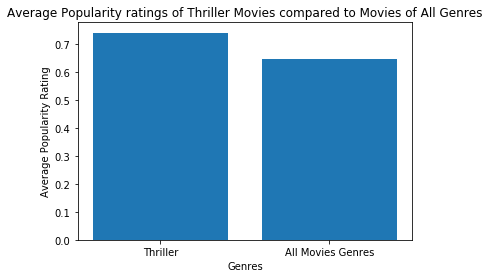

In [90]:
# Plotting the Above Results
plt.bar(["Thriller", "All Movies Genres"], [mean_pop_th, mean_pop_all])
plt.title("Average Popularity ratings of Thriller Movies compared to Movies of All Genres")
plt.xlabel("Genres")
plt.ylabel("Average Popularity Rating");

### Getting the Population of Movies that have Genres that are other than "Thriller". Here, we verified index values and we can exclude the dataframe containing "Thriller" Genre from the main dataframe by using index. Note: Here, infact there are some NULL values in "genre" in original dataframe "df". We will assume that these movies, were not having characteristics to be included in any of the listed "genres" and therefore also were not of the "thriller" Genre.

In [91]:
# Ref: https://stackoverflow.com/questions/28901683/pandas-get-rows-which-are-not-in-other-dataframe
# Assuming (& Verifying) that the indexes are consistent in the dataframes (not taking into account the actual col values)
# e.g. df1[~df1.index.isin(df2.index)]
df_oth = df[~df.index.isin(dgth.index)]
df_oth.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
7,286217,tt3659388,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,http://www.foxmovies.com/movies/the-martian,Ridley Scott,Bring Him Home,...,"During a manned mission to Mars, Astronaut Mar...",141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,9/30/15,4572,7.6,2015,9.935996e+07,5.477497e+08
8,211672,tt2293640,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,http://www.minionsmovie.com/,Kyle Balda|Pierre Coffin,"Before Gru, they had a history of bad bosses",...,"Minions Stuart, Kevin and Bob are recruited by...",91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,6/17/15,2893,6.5,2015,6.807997e+07,1.064192e+09
9,150540,tt2096673,6.326804,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,http://movies.disney.com/inside-out,Pete Docter,Meet the little voices inside your head.,...,"Growing up can be a bumpy road, and it's no ex...",94,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,6/9/15,3935,8.0,2015,1.609999e+08,7.854116e+08
10,206647,tt2379713,6.200282,245000000,880674609,Spectre,Daniel Craig|Christoph Waltz|LÃ©a Seydoux|Ralp...,http://www.sonypictures.com/movies/spectre/,Sam Mendes,A Plan No One Escapes,...,A cryptic message from Bondâ€™s past sends him...,148,Action|Adventure|Crime,Columbia Pictures|Danjaq|B24,10/26/15,3254,6.2,2015,2.253999e+08,8.102203e+08


In [92]:
df_oth.shape

(7958, 21)

#### Here,above output gives 7958 rows. Verifying that rows having "thriller" genre (count 2908) when substracted from all data rows (10866) ,  i.e. = 7958 rows ). It matches the shape (row count) of above output. So index solution is correct

<a id='genrepop'></a>
### ANALYSIS ANS: Comparing the Popularity of "Thriller" Genre alone compared to overall population All Genres (i.e. including Thriller)

In [93]:
# Mean Popularity of Movies of Genres other than "Thriller" Genre
mean_pop_other_thrill = df_oth['popularity'].mean()
mean_pop_other_thrill

0.6116998409148011

In [94]:
# Mean Popularity of Movies having "Thriller" Genre
mean_pop_th = dgth_pr['popularity'].mean()
mean_pop_th

0.7415629927760566

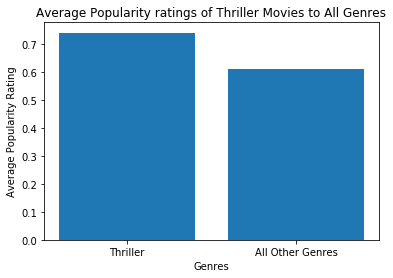

In [95]:
# Plotting the Above Results
plt.bar(["Thriller", "All Other Genres"], [mean_pop_th, mean_pop_other_thrill])
plt.title("Average Popularity ratings of Thriller Movies to All Genres")
plt.xlabel("Genres")
plt.ylabel("Average Popularity Rating");

### ANALYSIS ANS: Thriller seems to be defintely more popular Genre in comparison to All Movies that are non-thriller Genres. As expected

### ANALYSIS ANS: Carrying out inviestigation for Genre "Comedy"

In [96]:
# Ref: https://stackoverflow.com/questions/11350770/select-by-partial-string-from-a-pandas-dataframe
# e.g. df[df["A"].str.contains("Hello|Britain", na=False)]
# Using Dataframe df
df_co = df[df["genres"].str.contains("Comedy", na=False)]
#check
df_co['genres'].head()

8     Family|Animation|Adventure|Comedy
9               Comedy|Animation|Family
13        Action|Comedy|Science Fiction
24                         Comedy|Drama
26                               Comedy
Name: genres, dtype: object

In [97]:
df_co.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
8,211672,tt2293640,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,http://www.minionsmovie.com/,Kyle Balda|Pierre Coffin,"Before Gru, they had a history of bad bosses",...,"Minions Stuart, Kevin and Bob are recruited by...",91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,6/17/15,2893,6.5,2015,6.807997e+07,1.064192e+09
9,150540,tt2096673,6.326804,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,http://movies.disney.com/inside-out,Pete Docter,Meet the little voices inside your head.,...,"Growing up can be a bumpy road, and it's no ex...",94,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,6/9/15,3935,8.0,2015,1.609999e+08,7.854116e+08
13,257344,tt2120120,5.984995,88000000,243637091,Pixels,Adam Sandler|Michelle Monaghan|Peter Dinklage|...,http://www.pixels-movie.com/,Chris Columbus,Game On.,...,Video game experts are recruited by the milita...,105,Action|Comedy|Science Fiction,Columbia Pictures|Happy Madison Productions,7/16/15,1575,5.8,2015,8.095996e+07,2.241460e+08
24,318846,tt1596363,4.648046,28000000,133346506,The Big Short,Christian Bale|Steve Carell|Ryan Gosling|Brad ...,http://www.thebigshortmovie.com/,Adam McKay,This is a true story.,...,The men who made millions from a global econom...,130,Comedy|Drama,Paramount Pictures|Plan B Entertainment|Regenc...,12/11/15,1545,7.3,2015,2.575999e+07,1.226787e+08
26,214756,tt2637276,4.564549,68000000,215863606,Ted 2,Mark Wahlberg|Seth MacFarlane|Amanda Seyfried|...,NaN,Seth MacFarlane,"Ted is Coming, Again.",...,Newlywed couple Ted and Tami-Lynn want to have...,115,Comedy,Universal Pictures|Media Rights Capital|Fuzzy ...,6/25/15,1666,6.3,2015,6.255997e+07,1.985944e+08


### Since the Genre of this dataframe is all "Comedy", once can confidently create a new column called "Genre" (singular)

In [98]:
df_co['Genre'] = "Comedy"
df_co.head()

C:\Users\ivc15058adm\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,Genre
8,211672,tt2293640,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,http://www.minionsmovie.com/,Kyle Balda|Pierre Coffin,"Before Gru, they had a history of bad bosses",...,91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,6/17/15,2893,6.5,2015,6.807997e+07,1.064192e+09,Comedy
9,150540,tt2096673,6.326804,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,http://movies.disney.com/inside-out,Pete Docter,Meet the little voices inside your head.,...,94,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,6/9/15,3935,8.0,2015,1.609999e+08,7.854116e+08,Comedy
13,257344,tt2120120,5.984995,88000000,243637091,Pixels,Adam Sandler|Michelle Monaghan|Peter Dinklage|...,http://www.pixels-movie.com/,Chris Columbus,Game On.,...,105,Action|Comedy|Science Fiction,Columbia Pictures|Happy Madison Productions,7/16/15,1575,5.8,2015,8.095996e+07,2.241460e+08,Comedy
24,318846,tt1596363,4.648046,28000000,133346506,The Big Short,Christian Bale|Steve Carell|Ryan Gosling|Brad ...,http://www.thebigshortmovie.com/,Adam McKay,This is a true story.,...,130,Comedy|Drama,Paramount Pictures|Plan B Entertainment|Regenc...,12/11/15,1545,7.3,2015,2.575999e+07,1.226787e+08,Comedy
26,214756,tt2637276,4.564549,68000000,215863606,Ted 2,Mark Wahlberg|Seth MacFarlane|Amanda Seyfried|...,NaN,Seth MacFarlane,"Ted is Coming, Again.",...,115,Comedy,Universal Pictures|Media Rights Capital|Fuzzy ...,6/25/15,1666,6.3,2015,6.255997e+07,1.985944e+08,Comedy


In [99]:
df_co.shape

(3793, 22)

In [100]:
# Mean Popularity of Movies having "Thriller" Genre
mean_pop_co = df_co['popularity'].mean()
mean_pop_co

0.5926073422093315

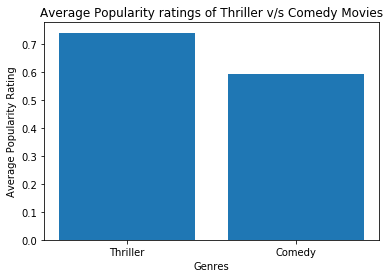

In [101]:
# Plotting the Above Results in bar graph
plt.bar(["Thriller", "Comedy"], [mean_pop_th, mean_pop_co])
plt.title("Average Popularity ratings of Thriller v/s Comedy Movies")
plt.xlabel("Genres")
plt.ylabel("Average Popularity Rating");

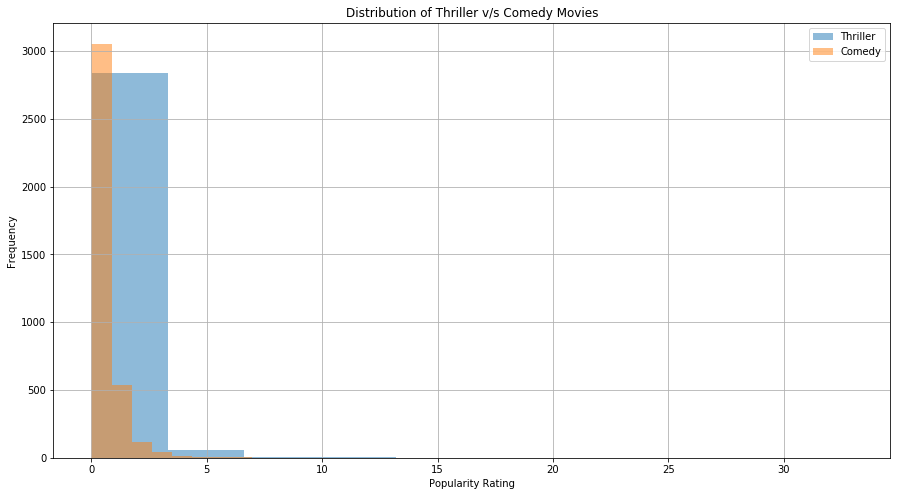

In [102]:
# Plotting the Above Results to visualize Historgrams
# Here, first defining Thrill and Com
Thrill = dgth.Genre == 'Thriller'
Com = df_co.Genre == 'Comedy'

dgth.popularity[Thrill].hist(alpha=0.5, label='Thriller', figsize=[15,8])
df_co.popularity[Com].hist(alpha=0.5, label='Comedy', figsize=[15,8])
plt.title('Distribution of Thriller v/s Comedy Movies')
plt.ylabel('Frequency')
plt.xlabel('Popularity Rating')
plt.legend();

### Looking at Above distribution it is clear that Thriller distribution has slightly higher overall popularity.

### ANALYSIS ANS: Thriller seems to be defintely more popular Genre in comparison to Comedy Movies.

## ANALYSIS: Comparing Proportions

### Find out the total number of Unique Genres. Note that there is an order in how "genres" appear. Meaning "Thriller" always comes after "Action" after the symbol "|". Meaning it is alphabetically ordered (populated). There once can calculate the total unique "Genre" values based on below. 

### IMPORTANT: Also, here we will not include the "NULL" values in unique genres. So will use the dataframe "dfg" (where NULLs were removed from "genres" column). "id" seems to be a good column. However, since we want all unique records, unique records are considered

In [103]:
# total unique Genres
totg = dfg.index.nunique()
totg

10842

In [104]:
# How many unique values that contain "Comedy" Genre values are there. Total Should be same as number of records in "df_co"
totco = df[df["genres"].str.contains("Comedy", na=False)].nunique()
totco

id                      3793
imdb_id                 3792
popularity              3785
budget                   281
revenue                 1754
original_title          3750
cast                    3748
homepage                 923
director                2124
tagline                 2855
keywords                3076
overview                3783
runtime                  157
genres                   708
production_companies    2531
release_date            2848
vote_count               696
vote_average              64
release_year              56
budget_adj              1217
revenue_adj             1772
dtype: int64

In [105]:
# How many unique records are there that contain "Comedy" Genre values are there. "id" seems to be a good column. However, since we want all unique records, We can also use "index" instead of "id" for ensuring all unique records are considered. In case, if one had not removed the duplicatd rows in "id" column earlier and if "id" had many Nulls (In case), they may have to be still retained.
# Total Should be same as number of records in "df_co"
totco_u = df[df["genres"].str.contains("Comedy", na=False)].index.nunique()
totco_u

3793

#### As Above: To find out How many unique records are there that contain "Comedy" Genre values are there. "id" seems to be a good column. However, since we want all unique records, We can also use "index" instead of "id" for ensuring all unique records are considered. In case, if one had not removed the duplicatd rows in "id" column earlier and if "id" had many Nulls (In case), they may have to be still retained.
#### Total was the same as number of records in "df_co" dataframe. So good.

In [106]:
# How many unique values that contain "Thriller" Genre values are there. Total Should be same as number of records in "dgth"
totth = df[df["genres"].str.contains("Thriller", na=False)].nunique()
totth

id                      2907
imdb_id                 2907
popularity              2903
budget                   272
revenue                 1407
original_title          2841
cast                    2901
homepage                 738
director                1724
tagline                 2390
keywords                2513
overview                2907
runtime                  134
genres                   670
production_companies    2330
release_date            2348
vote_count               699
vote_average              59
release_year              55
budget_adj              1134
revenue_adj             1423
dtype: int64

In [107]:
# How many unique records are there that contain "Comedy" Genre values are there. "id" seems to be a good column. However, since we want all unique records, We can also use "index" instead of "id" for ensuring all unique records are considered. In case, if one had not removed the duplicatd rows in "id" column earlier and even if "id" like columns had many Nulls (In case), they may have to be still retained.
# Total Should be same as number of records in "dgth"
totth_u = df[df["genres"].str.contains("Thriller", na=False)].index.nunique()
totth_u

2907

#### As Above, to find out how many unique records are there that contain "Comedy" Genre values are there. "id" seems to be a good column. However, since we want all unique records, We can also use "index" instead of "id" for ensuring all unique records are considered. In case, if one had not removed the duplicatd rows in "id" column earlier and even if "id" like columns had many Nulls (In case), they may have to be still retained.
#### Total Should be same as number of records in "dgth" dataframe.

In [108]:
dgth.shape

(2907, 27)

####  Verified that above number is same as number of records in "df_co" (i.e. records containing any movie marked as"comedy" genre movie)

### Comparing Proportions of movie genres where it belongs to "Thiller" v/s "Comedy" Genre (at lease one of the genres is that), as per proportion comparison taught in this course

In [109]:
prop_totco_u = totco_u/totg
prop_totth_u = totth_u/totg
# Check values of proportions
prop_totco_u, prop_totth_u

(0.349843202361188, 0.26812396236856667)

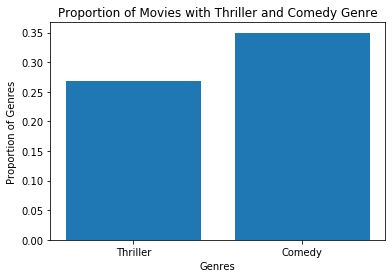

In [110]:
# Plotting the Proportions
plt.bar(["Thriller", "Comedy"], [prop_totth_u, prop_totco_u])
plt.title("Proportion of Movies with Thriller and Comedy Genre")
plt.xlabel("Genres")
plt.ylabel("Proportion of Genres");

## MOVIE Revenue Analysis

### Plotting Relationship between Popularity and Revenue (adjusted)

In [111]:
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [112]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


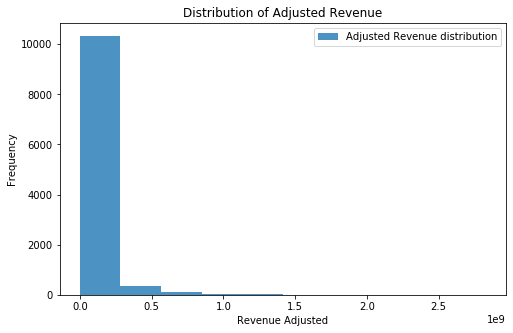

In [113]:
# Plot the distribution of adjusted revenue
rev_adj = df['revenue_adj']
rev_adj.name = 'Adjusted Revenue distribution'
rev_adj.plot(kind='hist', alpha=0.8, figsize=(8,5))
plt.legend()
plt.title('Distribution of Adjusted Revenue')
plt.ylabel('Frequency')
plt.xlabel('Revenue Adjusted')
plt.show();

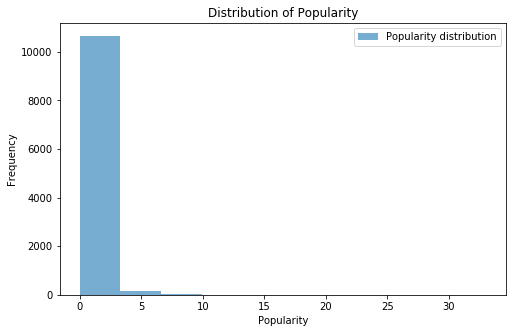

In [114]:
# Plot the distribution of popularity
pop = df['popularity']
pop.name = 'Popularity distribution'
pop.plot(kind='hist', alpha=0.6, figsize=(8,5))
plt.legend()
plt.title('Distribution of Popularity')
plt.ylabel('Frequency')
plt.xlabel('Popularity')
plt.show();

# Analysis ANS: No correlation (or strong relationship) between Movie popularity and Revenue. Proof is below in form of visual scatter plots

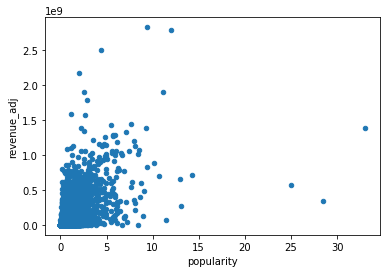

In [115]:
# plot relationship between popularity and adjusted revenue
df.plot(x='popularity', y='revenue_adj', kind='scatter');

In [116]:
dfr53 = df.query('revenue_adj <= 1000000000/2 & popularity <= 3')

In [117]:
dfr53.shape

(10483, 21)

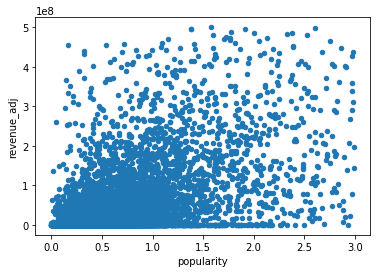

In [118]:
# plot (Zoom on the) relationship between popularity and adjusted revenue
dfr53.plot(x='popularity', y='revenue_adj', kind='scatter');

In [119]:
dfr101 = df.query('revenue_adj <= 1000000000/10 & popularity <= 1')

In [120]:
dfr101.shape

(8635, 21)

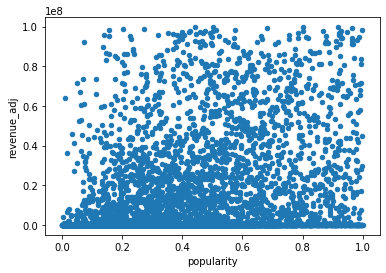

In [121]:
# plot (further Zoon on) relationship between popularity and adjusted revenue
dfr101.plot(x='popularity', y='revenue_adj', kind='scatter');

### ANALYSIS ANS: It does not seem from Graphs above where Popularity ratings between (0 to 1), (0 to 3) and (0 to max around 30) affects the Adjusted Revenue gained by the Movies. There does not seem to be such a trend or correlation between popularity and Adjusted Revenue at any levels (e.g. low revenue, low popularity)

### Let us Investigate if this is True for Comedy Genre Movies Only. Meaning Only "Comedy" and No Other Genres

In [122]:
# Ref: https://stackoverflow.com/questions/11350770/select-by-partial-string-from-a-pandas-dataframe
# e.g. df[df["A"].str.contains("Hello|Britain", na=False)]
# Using Dataframe df
dfcoo = df[df["genres"]=="Comedy"]
#check
dfcoo.head()
dfcoo['genres'].head()

26    Comedy
51    Comedy
69    Comedy
78    Comedy
91    Comedy
Name: genres, dtype: object

In [123]:
dfcoo.shape

(712, 21)

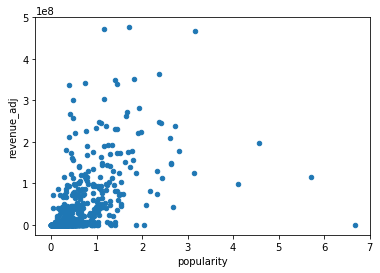

In [124]:
dfcoo.plot(x='popularity', y='revenue_adj', kind='scatter');

In [125]:
dfcoo1 = dfcoo.query('revenue_adj <= 1000000000/10 & popularity <= 1')

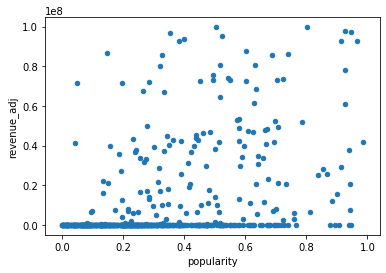

In [126]:
dfcoo1.plot(x='popularity', y='revenue_adj', kind='scatter');

### ANALYSIS ANS: It does not seem from Graphs above where Popularity ratings between (0 to 1) and (0 to max around 30) affects the Adjusted Revenue gained by the the Movies which are only Comedy Genre. There does not seem to be such a trend or correlation between popularity and Adjusted Revenue at any levels (e.g. low revenue, low popularity) for movies that fall under only "Comedy" Genre.

## Let us Investigate from a Different Angle of Popularity for High v/s Low Revenue Movies
#### Note: There are no Nulls in Popularity and Adjusted Revenue

In [127]:
# Use query to select each group and get its mean quality
rmean = round(df['revenue_adj'].mean())  ## Note: We rounded the Median here to get exact year.
highr = df.query('revenue_adj>= {}'.format(rmean))
lowr = df.query('revenue_adj < {}'.format(rmean))

mean_rev_high = highr['revenue_adj'].mean()
mean_rev_low = lowr['revenue_adj'].mean()

In [128]:
#check
mean_rev_high 

228226088.31450802

In [129]:
#check
mean_rev_low

4893656.256476277

### Let us investigate popularity for Lowest and Highest Grossing Movies (i.e. Lowest v/s Highest Adjusted Revenue)
#### FIrst, we Get Records for Lowest and Highest levels of Adjusted Revenue for Movies.

In [130]:
#check
type(mean_rev_high)

float

In [131]:
#check
type(df['revenue_adj'])

pandas.core.series.Series

In [132]:
# Get Records for Lowest and Highest Bands of Revenue
highest_r = df.query('revenue_adj >={}'.format(mean_rev_high))
lowest_r = df.query('revenue_adj < {}'.format(mean_rev_low))

In [133]:
#check
len(highest_r)

688

In [134]:
#check
len(lowest_r)

6903

In [135]:
#check the max
max(highest_r['revenue_adj'])

2827123750.41189

In [136]:
#check the min
min(highest_r['revenue_adj'])

228245299.70851898

In [137]:
#check the max
max(lowest_r['revenue_adj'])

4885193.69150605

In [138]:
# Also, check the min
min(lowest_r['revenue_adj'])

0.0

In [139]:
#  Mean of Adjusted Revenue in Lowest Revenue Band Movies.
(lowest_r['revenue_adj']).mean()

166076.8919230638

In [140]:
### Investigating the Avg. popularity of High v/s Low Revenue Movies

In [141]:
# Mean Popularity of High v/s Low Revenue Movies
mean_pop_highr = highest_r['popularity'].mean()
mean_pop_lowr = lowest_r['popularity'].mean()
#check
#mean_pop_highr
mean_pop_lowr

0.3436481166159634

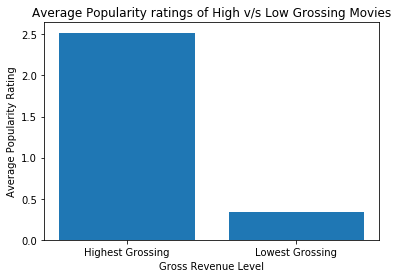

In [142]:
# Plotting the Above Results in bar graph
plt.bar(["Highest Grossing", "Lowest Grossing"], [mean_pop_highr, mean_pop_lowr])
plt.title("Average Popularity ratings of High v/s Low Grossing Movies")
plt.xlabel("Gross Revenue Level")
plt.ylabel("Average Popularity Rating");

## From Above graph we can say that Highest Grossing (High revenue) movies are more popular than Lowest Grossing (Low Revenue) movies.

## CHECK How many Records has Adjusted Revenue Listed as '0'. Assumption: is that these moives did not make any revenue. Since the values are listed as "0" , these will not be considered as missing data.

In [143]:
# Check for how many movies the adjusted revenue was reported 0
min(lowest_r['revenue_adj'])

0.0

In [144]:
# Check for how many movies the adjusted revenue was reported 0
len(lowest_r[lowest_r['revenue_adj'] == 0])

6016

In [145]:
# Reverify
(lowest_r['revenue_adj'] == 0).sum()

6016

In [146]:
# Confirming the above number - Reverifying the count where Revenue adjusted is 0 in original dataset.
len(df[df['revenue_adj'] == 0])

6016

## IMPORTANT ASSUMPTION:
###  When Revenue and Adjusted Revenue is reporteda 0 (i.e. for 6016 records), we assume that move made no money (no revenue). We will not consider these to be unreported or NULL or bad data in our Analysis.

In [147]:
#Check Records were Adjusted Revenue is marked as 0 and revenue is marked 0 as well.
df[df['revenue_adj'] == 0].head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
48,265208,tt2231253,2.932340,30000000,0,Wild Card,Jason Statham|Michael Angarano|Milo Ventimigli...,NaN,Simon West,Never bet against a man with a killer hand.,...,When a Las Vegas bodyguard with lethal skills ...,92,Thriller|Crime|Drama,Current Entertainment|Lionsgate|Sierra / Affin...,1/14/15,481,5.3,2015,2.759999e+07,0.0
67,334074,tt3247714,2.331636,20000000,0,Survivor,Pierce Brosnan|Milla Jovovich|Dylan McDermott|...,http://survivormovie.com/,James McTeigue,His Next Target is Now Hunting Him,...,A Foreign Service Officer in London tries to p...,96,Crime|Thriller|Action,Nu Image Films|Winkler Films|Millennium Films|...,5/21/15,280,5.4,2015,1.839999e+07,0.0
74,347096,tt3478232,2.165433,0,0,Mythica: The Darkspore,Melanie Stone|Kevin Sorbo|Adam Johnson|Jake St...,http://www.mythicamovie.com/#!blank/wufvh,Anne K. Black,NaN,...,When Teelaâ€™s sister is murdered and a powerf...,108,Action|Adventure|Fantasy,Arrowstorm Entertainment,6/24/15,27,5.1,2015,0.000000e+00,0.0
75,308369,tt2582496,2.141506,0,0,Me and Earl and the Dying Girl,Thomas Mann|RJ Cyler|Olivia Cooke|Connie Britt...,http://www.foxsearchlight.com/meandearlandthed...,Alfonso Gomez-Rejon,A Little Friendship Never Killed Anyone.,...,Greg is coasting through senior year of high s...,105,Comedy|Drama,Indian Paintbrush,6/12/15,569,7.7,2015,0.000000e+00,0.0
92,370687,tt3608646,1.876037,0,0,Mythica: The Necromancer,Melanie Stone|Adam Johnson|Kevin Sorbo|Nicola ...,http://www.mythicamovie.com/#!blank/y9ake,A. Todd Smith,NaN,...,Mallister takes Thane prisoner and forces Mare...,0,Fantasy|Action|Adventure,Arrowstorm Entertainment|Camera 40 Productions...,12/19/15,11,5.4,2015,0.000000e+00,0.0


In [148]:
# Check the Mean Year to see if Adjusted Revenue was reported as 0 for older movies ?
df_0r = df[df['revenue_adj'] == 0]
df_0r.release_year.mean()

2001.6459441489362

In [149]:
# The release year mean where Adjusted Revenue is 0 is similar to overall mean of Release year. So this seems to be at random.
df.release_year.mean()

2001.3218591808559

Text(0.5, 1, 'Comparison of Popularity Ratings for Highest and Lowest Grossing Movies')

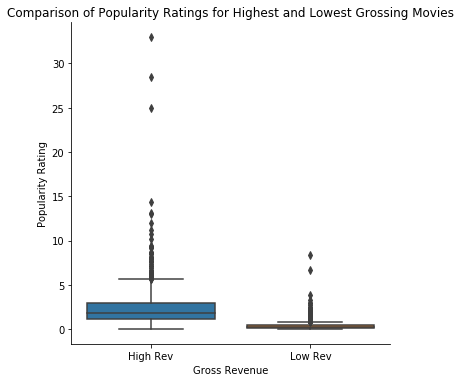

In [150]:
# Boxplot
# Ref: as per link sent by instructor review
# Ref: https://seaborn.pydata.org/generated/seaborn.catplot.html
# Ref: https://python-graph-gallery.com/30-basic-boxplot-with-seaborn/

# Create Dataframe
# Ref: https://stackoverflow.com/questions/14620972/how-to-combine-two-vectors-into-a-data-frame
import seaborn as sns
pop_high = highest_r['popularity']
pop_low = lowest_r['popularity']

data_rp = pd.DataFrame({'High Rev':pop_high, 'Low Rev':pop_low})  # Here NA's will be ingored in plot, so no need to create data with levels for now.
sns.catplot(kind="box", data=data_rp);
plt.xlabel('Gross Revenue')
plt.ylabel('Popularity Rating')
plt.title('Comparison of Popularity Ratings for Highest and Lowest Grossing Movies')

### From Above graph we can say that Highest Grossing movies are more popular than Lowest Grossing movies, on an Average. Looking at the spread (variance) of data points in box plots it seems that some Highest Grossing movies were really popular. Also, it seems that some Lowest Grossing Movies had good popularity as well. However, on an Average, highest grossing movies had more popularity ratings. Looking at the Spread (variance) from box plot, it seems we must later investigate this using statistical significance of means for this notion (hypothesis).

<a id='totproyr'></a>
# ANALYSIS: Investigating the Revenue Metrics of Movies by date (Year)

In [151]:
# It is evident from df.info() that there are no NULL values in Adjusted Revenue or Release Year
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10865 non-null  int64  
 1   imdb_id               10855 non-null  object 
 2   popularity            10865 non-null  float64
 3   budget                10865 non-null  int64  
 4   revenue               10865 non-null  int64  
 5   original_title        10865 non-null  object 
 6   cast                  10789 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10821 non-null  object 
 9   tagline               8041 non-null   object 
 10  keywords              9372 non-null   object 
 11  overview              10861 non-null  object 
 12  runtime               10865 non-null  int64  
 13  genres                10842 non-null  object 
 14  production_companies  9835 non-null   object 
 15  release_date       

In [152]:
df['release_year'].value_counts()
len(df['release_year'].value_counts())

56

In [153]:
# total unique Release Years - 56 total unique Release Years Verified using above code as well.
dry_u = df.release_year.nunique()
dry_u

56

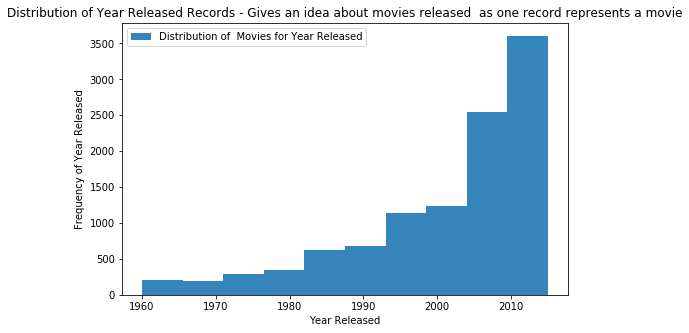

In [154]:
# Plot the distribution of popularity
yr = df['release_year']
yr.name = 'Distribution of  Movies for Year Released'
yr.plot(kind='hist', alpha=0.9, figsize=(8,5))
plt.legend()
plt.title('Distribution of Year Released Records - Gives an idea about movies released  as one record represents a movie')
plt.ylabel('Frequency of Year Released')
plt.xlabel('Year Released')
plt.show();

### More movies seem to have been released during later years

### Lets get the Count of Movies by Release Year by the Movies imdb_id

In [155]:
dct_yr = df.groupby('release_year').imdb_id.count()
dct_yr.head()
# Note: Here the year serves as index and value is count

release_year
1960    32
1961    31
1962    32
1963    34
1964    42
Name: imdb_id, dtype: int64

### Aggregate the Adjusted Revenue by Year

In [156]:
totr_yr = df.groupby('release_year').revenue_adj.sum()
totr_yr.head()
# Note: Here the year serves as index and value is total sum of adjsuted revenue.

release_year
1960    1.069117e+09
1961    2.463622e+09
1962    1.553996e+09
1963    1.334357e+09
1964    2.397193e+09
Name: Adjusted Revenue distribution, dtype: float64

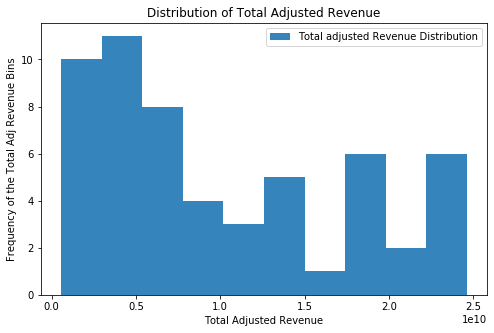

In [157]:
# Plot the distribution of "Adjusted Revenue"
totr_yr.name = 'Total adjusted Revenue Distribution'
totr_yr.plot(kind='hist', alpha=0.9, figsize=(8,5))
plt.legend()
plt.title('Distribution of Total Adjusted Revenue')
plt.ylabel('Frequency of the Total Adj Revenue Bins')
plt.xlabel('Total Adjusted Revenue')
plt.show();

### Normalize (Divide) the Adjusted Revenue with number of movies released that year

In [158]:
ntotr_yr = totr_yr/dct_yr
ntotr_yr.tail()
# Note: Here the year serveed as index earlier and is retained. Value is the normalized adjsuted revenue.

release_year
2011    4.253789e+07
2012    3.998072e+07
2013    3.514198e+07
2014    3.206181e+07
2015    3.920612e+07
dtype: float64

In [159]:
ntotr_yr.dtype

dtype('float64')

In [160]:
type(ntotr_yr)      # This is a Series

pandas.core.series.Series

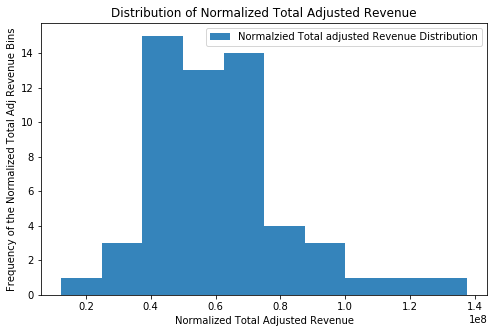

In [161]:
# Plot the distribution of "Normalized Total Adjusted Revenue"
ntotr_yr.name = 'Normalzied Total adjusted Revenue Distribution'
ntotr_yr.plot(kind='hist', alpha=0.9, figsize=(8,5))
plt.legend()
plt.title('Distribution of Normalized Total Adjusted Revenue')
plt.ylabel('Frequency of the Normalized Total Adj Revenue Bins')
plt.xlabel('Normalized Total Adjusted Revenue')
plt.show();

### Let us Merge the Data

In [162]:
dfr = df.copy()

In [163]:
#dfr['norm_rev_adj'] = (ntotr_yr,)

In [164]:
dfr.tail()
dfr.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [165]:
# Type of dfr
type(dfr)

pandas.core.frame.DataFrame

In [166]:
# Another way to do this directly from dataframe dfr (which is pretty much like original dataframe df)
dfr_yr = dfr.groupby(['release_year'])['revenue_adj'].sum()
dfr_yr.head()
#dfr['norm_rev_adj'] =  dfr.groupby(['release_year'])['revenue_adj'].sum()
#dfr.head()

release_year
1960    1.069117e+09
1961    2.463622e+09
1962    1.553996e+09
1963    1.334357e+09
1964    2.397193e+09
Name: revenue_adj, dtype: float64

In [167]:
type(dfr_yr)

pandas.core.series.Series

In [168]:
# Index of dfr_yr
dfr_yr.index

Int64Index([1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
            1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
            1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
            1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
            2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
            2015],
           dtype='int64', name='release_year')

### The groupby output will have an index or multi-index on rows corresponding to your chosen grouping variables. To avoid setting this index, pass “as_index=False” to the groupby operation.

#### Ref: https://www.shanelynn.ie/summarising-aggregation-and-grouping-data-in-python-pandas/


#### Perform the Aggregation. Here, column name will remain the same, althrough it will reflect sum

In [169]:
# Ref: https://www.shanelynn.ie/summarising-aggregation-and-grouping-data-in-python-pandas/
# e.g. data.groupby('month', as_index=False).agg({"duration": "sum"})

dfr_sum = dfr.groupby('release_year', as_index=False).agg({"revenue_adj": "sum"})
dfr_sum.head()
dfr_sum.tail()

,release_year,revenue_adj
51,2011,2.297046e+10
52,2012,2.342870e+10
53,2013,2.312342e+10
54,2014,2.241120e+10
55,2015,2.462144e+10


In [170]:
type(dfr_sum)
# Note: Now this is a Pandas dataframe

pandas.core.frame.DataFrame

#### Perform the above Aggregation by Renaming the new Aggregate column to "sum_rev"

In [171]:
# Ref: https://www.shanelynn.ie/summarising-aggregation-and-grouping-data-in-python-pandas/

# e.g. data[data['item'] == 'call'].groupby('month').agg(
    # Get max of the duration column for each group
#    max_duration=('duration', max),
#    # Get min of the duration column for each group
#    min_duration=('duration', min),
    # Get sum of the duration column for each group
#    total_duration=('duration', sum),
    # Apply a lambda to date column
#    num_days=("date", lambda x: (max(x) - min(x)).days)    


dfr.groupby('release_year').agg(sum_rev = ('revenue_adj', sum))

# Create a dataframe
dfr_sum2 = dfr.groupby('release_year').agg(sum_rev = ('revenue_adj', sum))
dfr_sum2.head()
dfr_sum2.tail()

,sum_rev
release_year,
2011,2.297046e+10
2012,2.342870e+10
2013,2.312342e+10
2014,2.241120e+10
2015,2.462144e+10


In [172]:
type(dfr_sum2)
# Note: Now this is a Pandas dataframe

pandas.core.frame.DataFrame

### Just Merge the DataFrames as the legthns are different and we created a column for aggregated sum for each year

####  Ref: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html
#### Ref: https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.merge.html#

In [173]:
# merge datasets
# Ref: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html
# Ref: https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.merge.html#
# left: use only keys from left frame, similar to a SQL left outer join; preserve key order.
dfrn = dfr.merge(dfr_sum2, left_on='release_year', right_on='release_year', how='left')
dfrn.shape
# Note that Shape looks good after the Left Outer Join

(10865, 22)

In [174]:
#Check
dfrn.head()
# dfrn.tail()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,sum_rev
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,2.462144e+10
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,2.462144e+10
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,2.462144e+10
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,2.462144e+10
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,2.462144e+10


In [175]:
#check that merge is successful (left outer join successful). Now data records for each release year will have sum of the total revenues for that year
dfrn['sum_rev'].head()    # Not that the Sum of movies in realease year 2015 looks correct.
# dfrn['sum_rev'].tail()

0    2.462144e+10
1    2.462144e+10
2    2.462144e+10
3    2.462144e+10
4    2.462144e+10
Name: sum_rev, dtype: float64

In [176]:
#check
dfrn.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
sum_rev                 float64
dtype: object

### Plotting the Bar plot of Release Year v/s Sum of Revenue

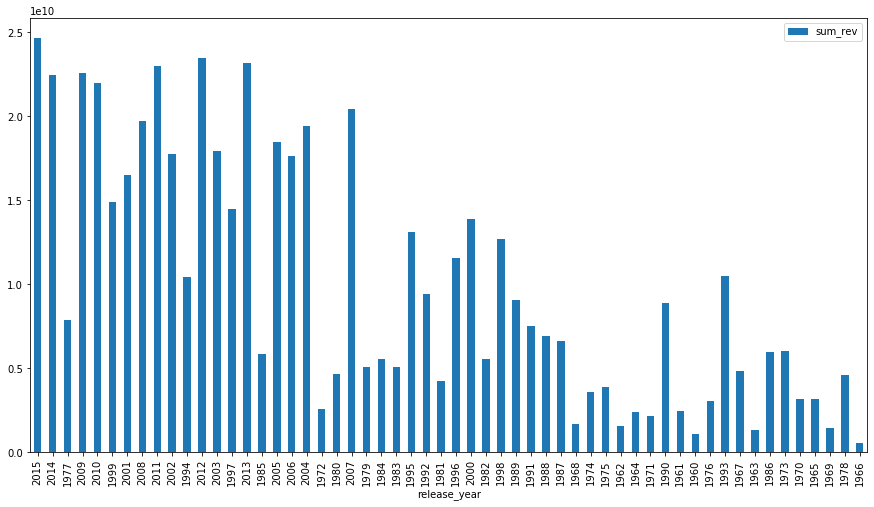

In [177]:
# Plotting the Release year and Sum will create the Same plot as earlier. However, there are duplicate row values
# First drop the duplicate values of release_year and sum of revenue adj (sum_rev)
dfrn2 = dfrn[['release_year', 'sum_rev']].drop_duplicates()
dfrn2.plot(x='release_year', y='sum_rev', kind='bar', figsize=(15, 8))

# Note: This would reselble the Historam plot of "revenue_adj" plotted earlier.

In [178]:
#check
dfrn2.dtypes

release_year      int64
sum_rev         float64
dtype: object

In [179]:
#check
dfrn2.head()

,release_year,sum_rev
0,2015,2.462144e+10
629,2014,2.241120e+10
1329,1977,7.845261e+09
1386,2009,2.254393e+10
1919,2010,2.195903e+10


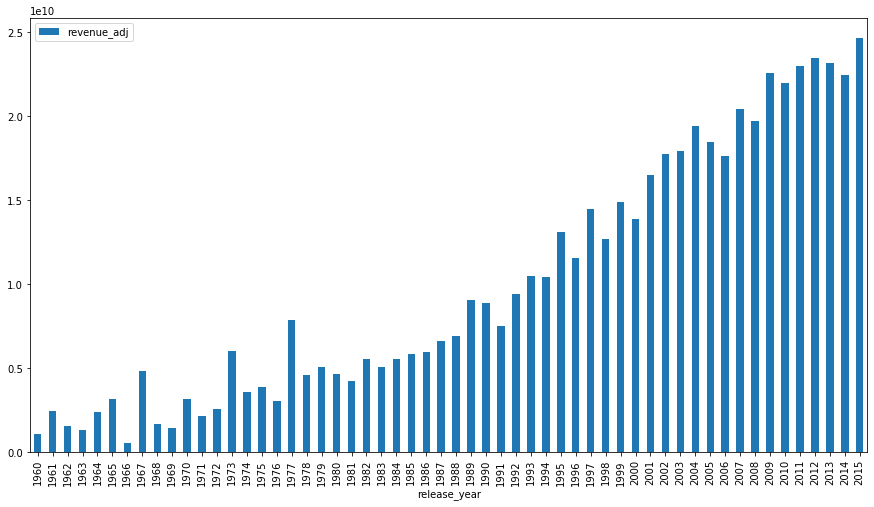

In [180]:
# Plot Sorted by the Year using Earlier object
dfr_sum.plot(x='release_year', y='revenue_adj', kind='bar', figsize=(15, 8))

<a id='protm'></a>
## ANALYSIS: Let us Investigate the Profitability of Movies

### Profit (Net Profit) of a Movie is defined here as Adjusted Revenue minus Adjusted Budget

In [181]:
# Lets work to add "profit" column to dataframe dfr. Revenue and Budget both columns are integers
dfr['profit_adj'] = (dfr['revenue_adj'] - dfr['budget_adj'])
dfr['profit_adj'].head()

0    1.254446e+09
1    2.101614e+08
2    1.704191e+08
3    1.718723e+09
4    1.210949e+09
Name: profit_adj, dtype: float64

In [182]:
#check
dfr.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,2.101614e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,1.704191e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,1.718723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,1.210949e+09


## Find out the Number of Records where Profit was Negative. Less than 0. We will assume it as Loss.

In [183]:
dfr.shape

(10865, 22)

In [184]:
# Number of Records where profit is less than 0.
len(dfr[dfr['profit_adj'] < 0])

2387

In [185]:
# Showing Records where profit is less than 0. These will be considered as Loss (negative profit)
dfr[dfr['profit_adj'] <0].head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit_adj
48,265208,tt2231253,2.932340,30000000,0,Wild Card,Jason Statham|Michael Angarano|Milo Ventimigli...,NaN,Simon West,Never bet against a man with a killer hand.,...,92,Thriller|Crime|Drama,Current Entertainment|Lionsgate|Sierra / Affin...,1/14/15,481,5.3,2015,2.759999e+07,0.000000e+00,-2.759999e+07
57,210860,tt3045616,2.575711,60000000,30418560,Mortdecai,Johnny Depp|Gwyneth Paltrow|Ewan McGregor|Paul...,http://mortdecaithemovie.com/,David Koepp,Sophistication Has a Name.,...,106,Comedy|Adventure,Lionsgate|Mad Chance|OddLot Entertainment|Huay...,1/21/15,696,5.3,2015,5.519998e+07,2.798506e+07,-2.721491e+07
59,201088,tt2717822,2.550747,70000000,17752940,Blackhat,Chris Hemsworth|Leehom Wang|Tang Wei|Viola Dav...,http://www.legendary.com/film/blackhat/,Michael Mann,We are no longer in control.,...,133,Mystery|Crime|Action|Thriller|Drama,Universal Pictures|Forward Pass|Legendary Pict...,1/13/15,584,5.0,2015,6.439997e+07,1.633270e+07,-4.806727e+07
66,205775,tt1390411,2.345821,100000000,93820758,In the Heart of the Sea,Chris Hemsworth|Benjamin Walker|Cillian Murphy...,http://www.intheheartoftheseamovie.com/,Ron Howard,Based on the incredible true story that inspir...,...,122,Thriller|Drama|Adventure|Action|History,Imagine Entertainment|Spring Creek Productions...,11/20/15,805,6.4,2015,9.199996e+07,8.631506e+07,-5.684900e+06
67,334074,tt3247714,2.331636,20000000,0,Survivor,Pierce Brosnan|Milla Jovovich|Dylan McDermott|...,http://survivormovie.com/,James McTeigue,His Next Target is Now Hunting Him,...,96,Crime|Thriller|Action,Nu Image Films|Winkler Films|Millennium Films|...,5/21/15,280,5.4,2015,1.839999e+07,0.000000e+00,-1.839999e+07


### Let us find out the Mean Net Profit (adjusted) by Year for Movies

In [186]:
prof_yr = dfr.groupby('release_year').profit_adj.mean()
prof_yr.tail()

release_year
2011    2.634867e+07
2012    2.648033e+07
2013    2.196993e+07
2014    2.158927e+07
2015    2.803279e+07
Name: profit_adj, dtype: float64

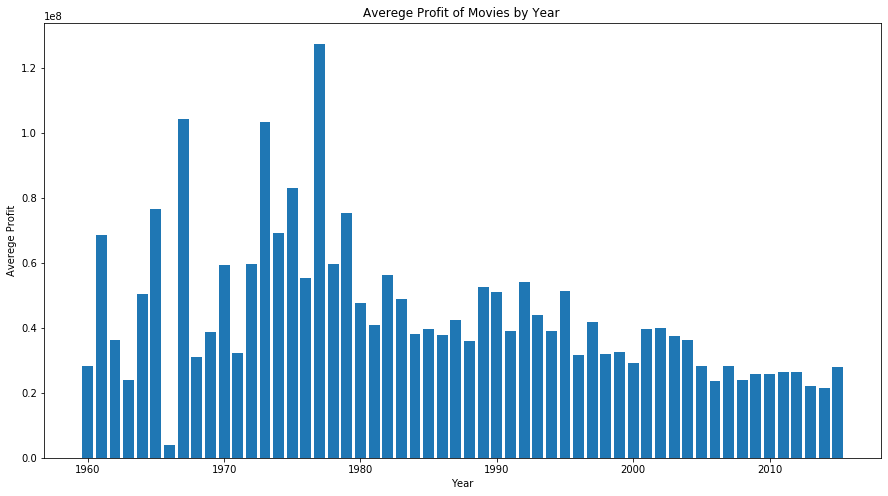

In [187]:
# Plot the Adjusted Profits
plt.subplots(figsize=(15, 8))
plt.bar(prof_yr.index, prof_yr)
plt.title('Averege Profit of Movies by Year ')
plt.xlabel('Year')
plt.ylabel('Averege Profit');

<a id='oldnewpro'></a>
# Analysis Que:Whether Old movies or New movies made more per-movie net profit was made on an average.

### Comparing the Avg Net Profit of Old v/s New Movies

#### For this we will simply Merge the dataframes we had created

In [188]:
#check
prof_yr.head()

release_year
1960    2.832787e+07
1961    6.861480e+07
1962    3.623546e+07
1963    2.388893e+07
1964    5.046705e+07
Name: profit_adj, dtype: float64

In [189]:
# Ref: https://www.shanelynn.ie/summarising-aggregation-and-grouping-data-in-python-pandas/

# e.g. data[data['item'] == 'call'].groupby('month').agg(
    # Get max of the duration column for each group
#    max_duration=('duration', max),
#    # Get min of the duration column for each group
#    min_duration=('duration', min),
    # Get sum of the duration column for each group
#    total_duration=('duration', sum),
    # Apply a lambda to date column
#    num_days=("date", lambda x: (max(x) - min(x)).days)    


dfr.groupby('release_year').agg(sum_profit = ('profit_adj', sum))

# Create a dataframe
dfr_sum_prof = dfr.groupby('release_year').agg(sum_profit = ('profit_adj', sum))
dfr_sum_prof.head()
dfr_sum_prof.tail()

,sum_profit
release_year,
2011,1.422828e+10
2012,1.557044e+10
2013,1.447818e+10
2014,1.511249e+10
2015,1.763262e+10


In [190]:
dfr_sum_prof.shape

(56, 1)

In [191]:
#check
dfrn2.head()

,release_year,sum_rev
0,2015,2.462144e+10
629,2014,2.241120e+10
1329,1977,7.845261e+09
1386,2009,2.254393e+10
1919,2010,2.195903e+10


In [192]:
dfrn2.shape

(56, 2)

In [193]:
#### Count the Number of Movies Released during each year.

In [194]:
# Ref: https://www.shanelynn.ie/summarising-aggregation-and-grouping-data-in-python-pandas/

# Create a dataframe
dmcnt = dfr['release_year'].value_counts()
#dmcnt.head()
dmcnt.tail()

1963    34
1962    32
1960    32
1969    31
1961    31
Name: release_year, dtype: int64

In [195]:
type(dmcnt)

pandas.core.series.Series

In [196]:
mcnt = dfr.groupby('release_year').id.count()
mcnt.head()
# Note: Here the year serves as index and value is count

release_year
1960    32
1961    31
1962    32
1963    34
1964    42
Name: id, dtype: int64

In [197]:
mcnt.index

Int64Index([1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
            1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
            1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
            1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
            2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
            2015],
           dtype='int64', name='release_year')

In [198]:
type(mcnt)

pandas.core.series.Series

In [199]:
# Convert the above Series to Dataframe
d_mcnt = mcnt.to_frame()
d_mcnt.head()

,id
release_year,
1960,32
1961,31
1962,32
1963,34
1964,42


In [200]:
# Change the column name from "id" to "movie_count"
d_mcnt.rename(columns = {"id": "movie_count"}, inplace=True)
d_mcnt.head()

,movie_count
release_year,
1960,32
1961,31
1962,32
1963,34
1964,42


In [201]:
type(dmcnt)

pandas.core.series.Series

In [202]:
# Merge two DataFrames
# merge datasets
# Ref: https://pandas.pydata.org/pandas-docs/version/0.23.4/merging.html

d_mt = d_mcnt.merge(dfr_sum_prof, left_on='release_year', right_on='release_year', how='inner')
d_mt.shape
# Note that Shape looks good after the Inner Join

(56, 2)

In [203]:
d_mt.head()

,movie_count,sum_profit
release_year,,
1960,32,9.064920e+08
1961,31,2.127059e+09
1962,32,1.159535e+09
1963,34,8.122237e+08
1964,42,2.119616e+09


In [204]:
# Merge the above two 
# merge datasets
# Ref: https://pandas.pydata.org/pandas-docs/version/0.23.4/merging.html

d_mrt = d_mt.merge(dfrn2, left_on='release_year', right_on='release_year', how='inner')
d_mrt.shape
# Note that Shape looks good after the Inner Join


(56, 4)

In [205]:
# Check
d_mrt.head()

,release_year,movie_count,sum_profit,sum_rev
0,1960,32,9.064920e+08,1.069117e+09
1,1961,31,2.127059e+09,2.463622e+09
2,1962,32,1.159535e+09,1.553996e+09
3,1963,34,8.122237e+08,1.334357e+09
4,1964,42,2.119616e+09,2.397193e+09


In [206]:
# Creating the New Columns
d_mrt['prof_norm']= d_mrt['sum_profit']/d_mrt['movie_count']
d_mrt['rev_norm']= d_mrt['sum_rev']/d_mrt['movie_count']

In [207]:
# Check
d_mrt.tail()

,release_year,movie_count,sum_profit,sum_rev,prof_norm,rev_norm
51,2011,540,1.422828e+10,2.297046e+10,2.634867e+07,4.253789e+07
52,2012,588,1.557044e+10,2.342870e+10,2.648033e+07,3.984473e+07
53,2013,659,1.447818e+10,2.312342e+10,2.196993e+07,3.508866e+07
54,2014,700,1.511249e+10,2.241120e+10,2.158927e+07,3.201601e+07
55,2015,629,1.763262e+10,2.462144e+10,2.803279e+07,3.914379e+07


In [208]:
# ERROR - Somehow For loops below are not working to show right numbers

#ncols = ["prof_norm", "rev_norm"]
#scols = ["sum_profit", "sum_rev"]
#for c in ncols:
#    for j in scols:
#        d_mrt[c]= d_mrt[j]/d_mrt['movie_count']


In [209]:
# Check
d_mrt.head()
d_mrt.tail()

,release_year,movie_count,sum_profit,sum_rev,prof_norm,rev_norm
51,2011,540,1.422828e+10,2.297046e+10,2.634867e+07,4.253789e+07
52,2012,588,1.557044e+10,2.342870e+10,2.648033e+07,3.984473e+07
53,2013,659,1.447818e+10,2.312342e+10,2.196993e+07,3.508866e+07
54,2014,700,1.511249e+10,2.241120e+10,2.158927e+07,3.201601e+07
55,2015,629,1.763262e+10,2.462144e+10,2.803279e+07,3.914379e+07


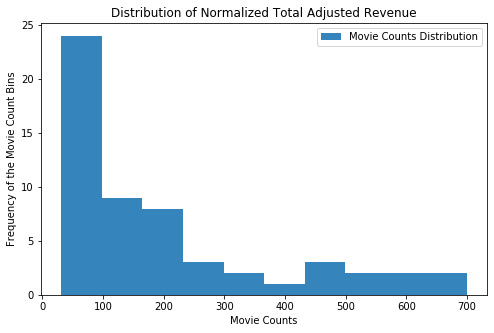

In [210]:
# Plot the distribution of "Movie Count"
mcnt = d_mrt['movie_count']
mcnt.name = 'Movie Counts Distribution'
mcnt.plot(kind='hist', alpha=0.9, figsize=(8,5))
plt.legend()
plt.title('Distribution of Normalized Total Adjusted Revenue')
plt.ylabel('Frequency of the Movie Count Bins')
plt.xlabel('Movie Counts')
plt.show();

### Plotting the Average (Normalized) Net Profit per Movie for each Year

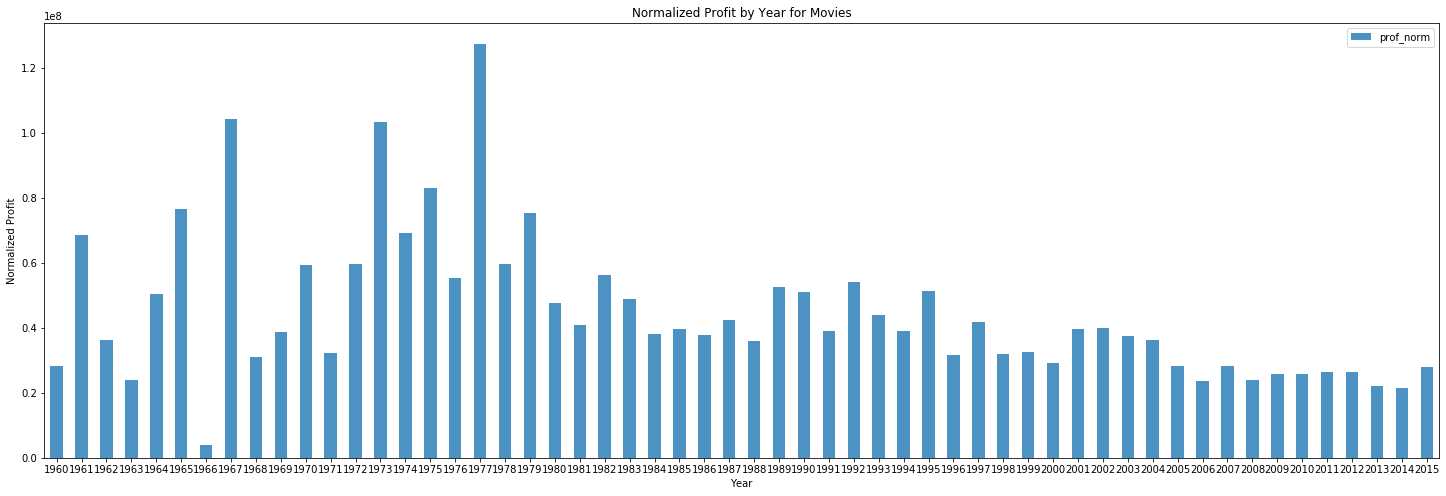

In [211]:
# Plot the Normalized Profit
xlabel_yr = d_mrt['release_year']
norm_pro = d_mrt['prof_norm']
norm_pro.plot(kind='bar', alpha=0.80, legend=True, figsize=(25, 8))
plt.title('Normalized Profit by Year for Movies')
plt.ylabel('Normalized Profit')
plt.xlabel('Year')
plt.xticks(d_mrt.index, xlabel_yr, rotation=0)
plt.show();

## Compariing Net Profit per Movie (Avg. Profit) for Old v/s New Movies

In [212]:
# Use query to select each group and get its mean quality
median = round(d_mrt['release_year'].median())  ## Note: We rounded the Median here to get exact year.
old = d_mrt.query('release_year< {}'.format(median))
new = d_mrt.query('release_year >= {}'.format(median))

mean_profit_old = old['prof_norm'].mean()
mean_profit_new = new['prof_norm'].mean()

In [213]:
# Check the median
round(median)       # Movies released in 1988 is the median (i.e. rounded number)

1988

In [214]:
d_mrt[d_mrt['release_year'] == round(d_mrt['release_year'].median())]

,release_year,movie_count,sum_profit,sum_rev,prof_norm,rev_norm
28,1988,145,5.189083e+09,6.895324e+09,3.578678e+07,4.755396e+07


### Comparing Average Adjusted Net Profit Per Movie for Old v/s New Movies

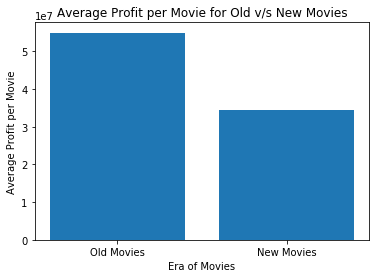

In [215]:
# Create a bar chart with proper labels
locations = [1, 2]
heights = [mean_profit_old, mean_profit_new]
labels = ['Old Movies', 'New Movies']
plt.bar(locations, heights, tick_label=labels)
plt.title('Average Profit per Movie for Old v/s New Movies')
plt.xlabel('Era of Movies')
plt.ylabel('Average Profit per Movie');

### From Above graph we can say that Older Movies seem to have made more (Adjusted Profit per movie) compared to New ones on an Average

### Comparing Total Adjusted Profit Per Movie for Old v/s New Movies

In [216]:
# Create a bar chart with proper labels for Sum total of Profits per Movie for Old v/s New Movies
sum_profit_old = old['prof_norm'].sum()
sum_profit_new = new['prof_norm'].sum()

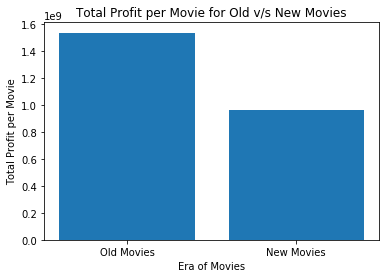

In [217]:

locations = [1, 2]
heights = [sum_profit_old, sum_profit_new]
labels = ['Old Movies', 'New Movies']
plt.bar(locations, heights, tick_label=labels)
plt.title('Total Profit per Movie for Old v/s New Movies')
plt.xlabel('Era of Movies')
plt.ylabel('Total Profit per Movie');

### From Above graph we can say that Older Movies seem to have made more (Adjusted Profit per movie) compared to New ones.

In [218]:
#check
d_mrt.head()

,release_year,movie_count,sum_profit,sum_rev,prof_norm,rev_norm
0,1960,32,9.064920e+08,1.069117e+09,2.832787e+07,3.340991e+07
1,1961,31,2.127059e+09,2.463622e+09,6.861480e+07,7.947167e+07
2,1962,32,1.159535e+09,1.553996e+09,3.623546e+07,4.856238e+07
3,1963,34,8.122237e+08,1.334357e+09,2.388893e+07,3.924580e+07
4,1964,42,2.119616e+09,2.397193e+09,5.046705e+07,5.707603e+07


Text(0.5, 1, 'Comparison of Normalized Profit - i.e. Avg. Per Movie Profit for Old v/s New Movies')

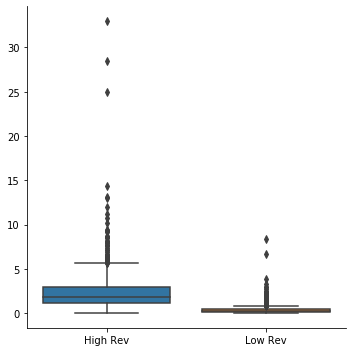

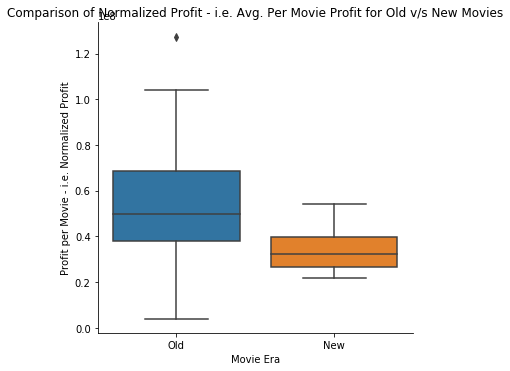

In [219]:
# Boxplot
# Ref: as per link sent by instructor review
# Ref: https://seaborn.pydata.org/generated/seaborn.catplot.html
# Ref: https://python-graph-gallery.com/30-basic-boxplot-with-seaborn/

# Create Dataframe
# Ref: https://stackoverflow.com/questions/14620972/how-to-combine-two-vectors-into-a-data-frame
import seaborn as sns
profit_old = old['prof_norm']
profit_new = new['prof_norm']

data_pro = pd.DataFrame({'Old':profit_old, 'New':profit_new})  # Here NA's will be ingored in plot, so no need to create data with levels for now.
sns.catplot(kind="box", data=data_rp);
sns.catplot(kind="box", data=data_pro);
plt.xlabel('Movie Era')
plt.ylabel('Profit per Movie - i.e. Normalized Profit')
plt.title('Comparison of Normalized Profit - i.e. Avg. Per Movie Profit for Old v/s New Movies')

### From Above graph we can say that Older Movies seem to have made more (Adjusted Profit per movie) compared to New Movies, on an Average. However, looking at the Spread (variance) from box plot, it seems we must later investigate statistical significance of means for this notion (hypothesis).

<a id='lastyrpro'></a>
## ANALYSIS ANS: Analyze Movie Profits for last 1 Year

In [220]:
dfp = dfr.copy()

In [221]:
#check
dfp.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,2.101614e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,1.704191e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,1.718723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,1.210949e+09


In [222]:
dfp.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
profit_adj              float64
dtype: object

In [223]:
data_pro.tail()

,Old,New
51,NaN,2.634867e+07
52,NaN,2.648033e+07
53,NaN,2.196993e+07
54,NaN,2.158927e+07
55,NaN,2.803279e+07


In [224]:
# Convert strings to datetime
# e.g. df['col'] = pd.to_datetime(df['col'])
dfp['release_date'] = pd.to_datetime(dfp['release_date'])

In [225]:
dfp['release_date'].head()

0   2015-06-09
1   2015-05-13
2   2015-03-18
3   2015-12-15
4   2015-04-01
Name: release_date, dtype: datetime64[ns]

In [226]:
dfp['release_date'].tail()

10861   2066-06-15
10862   2066-12-21
10863   2066-01-01
10864   2066-11-02
10865   2066-11-15
Name: release_date, dtype: datetime64[ns]

### Here the year is not being parsed correctly as datetime is parsing wrong year (e.g. 2066 instead of 1966)

In [227]:
# Find Max year
max(dfp['release_year'])

2015

### Simple function to correct this parsing of wrong year as stated below:

In [228]:
# We will allow dates of 2015, for correction but not beyond 2015.
# Below is the fix for dates

import datetime

def fix_date(x):

    if x.year > 2016:
        year = x.year - 100

    else:
        year = x.year
    return datetime.date(year,x.month,x.day)

dfp['release_date'] = dfp['release_date'].apply(fix_date)

In [229]:
# Find Max Date
max(dfp['release_date'])

datetime.date(2015, 12, 31)

In [230]:
# total Profits reported during most recent 3 year period.

# Vectorized Pandas solution (simple)
# Ref: https://stackoverflow.com/questions/3424899/whats-the-simplest-way-to-subtract-a-month-from-a-date-in-python
# e.g. df['date'] - pd.DateOffset(months=1)

end_date = max(dfp['release_date'])
start_date = end_date - pd.DateOffset(years=1)    # Here, we use start_date


In [231]:
# Check
end_date

datetime.date(2015, 12, 31)

In [232]:
#check
start_date   # Looks good - 3 years are substracted

Timestamp('2014-12-31 00:00:00')

In [233]:
# total Profit during past 1 year period

# Ref: https://stackoverflow.com/questions/40698043/slicing-multiple-ranges-of-columns-in-pandas-by-list-of-names
# Ref: https://kite.com/python/answers/how-to-filter-pandas-dataframe-rows-by-date-in-python

after_start_date = dfp["release_date"] > start_date
before_end_date = dfp["release_date"] <= end_date

between_two_dates = after_start_date & before_end_date
dfp.loc[between_two_dates].head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,2.101614e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,1.704191e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09,1.718723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09,1.210949e+09


In [234]:
#check 
start_date

Timestamp('2014-12-31 00:00:00')

#### Here, the start date is Dec 31, 2014. All movies after this date were considered as movies released in past 1 year. These will be movies released after Dec 31, 2014 - i.e. in the year 2015 in the data.The latest movie release date is Dec 31, 2015. So one can say that, these  records will reflect all movies released in past 1 year (which is year 2015)

In [235]:
# total sales during most recent 3 month period
# Assign the past 3 months (all records upto past 90 days from max date)
dp1y = dfp.loc[between_two_dates]

In [236]:
#check
dp1y.shape

(629, 22)

In [237]:
# Profit reported (for all movies) in past 1 year
round(dp1y['profit_adj'].sum())

17632622966.0

## Total Profit Declared in past 1 year by Movies is 17.6 Billion Dollars

## ASSUMPTIONS SUMMARY: 
#### 1. Profit (or Net Profit) = Adjusted Revenue minus Adjusted Budget. We will use this simple definition of profit for analysis. Whenever, profit is negative, we will consider it as negative profit (i.e. loss) and include in our analysis. (i.e. Net profit analysis)
#### 2. When Revenue and Adjusted Revenue is reporteda 0 (i.e. for 6016 records), we assume that move made no money (no revenue). We will not consider these to be unreported or NULL or bad data.

<a id='conclusions'></a>
## CONCLUSIONS:

### In the First section, I examined the relationship between popularity and adjusted revenue for Western movies over decades listed as records in this dataset. However, visually I could not find any correlation between popularity of movies.

### This led me to further investigate the popularity ratings of highest v/s lowest grossing movies (i.e. adjusted revenue). Looking at the graphs: a) Comparison of mean plots & b) Box plot, one can say that Highest Grossing movies are more popular than Lowest Grossing movies, on an Average. Looking at the spread (variance) of data points in box plots it seems that some Highest Grossing movies were really popular. Also, it seems that some Lowest Grossing Movies had good popularity as well. However, on an Average, highest grossing movies had more popularity ratings. There seems to be a correlation, however i would be weary to state a causality, saying High revenue caused high popularity. Looking at the Spread (variance) from box plot, it seems we must later investigate this using statistical significance of means for this notion (hypothesis).


### From the Analysis on Per Movie Adjusted profit for Old (release date Before 1988 ) v/s New movies (release date 1988 and after) and one cay say, it appears that Older Movies seem to have made more Total Adjusted Net Profit per movie compared to New movies. On an average, Older Movies seem to have made more Avg. Adjusted Net Profit per movie compared to Avg. Adjusted Profit for New moives. 

### There seems to be a correlation, however i would be weary to state a causality, saying that because the movies were older, they made more profits on an average. However, in the box plot, looking at the Spread (variance) of Adjusted Net Profit from box plot, especially in case of older movies, it seems that for Avg. Adjusted per movie profit, we must later investigate statistical significance of means for this notion (hypothesis).


### Also, in the year 2015 (latest in the data), highest number of Movies were Released. (Count = 629 Movies). Furthermore, Total Profit Declared in past 1 year by Movies is 17.6 Billion Dollars


#### *Caution: Many movies are showing adjusted revenue as "0". Total 6016 records. For simplicity, we have assumed that whenever the value of adjusted revenue is 0, movie made no money (revenue). Any negative profit will be accounted for (as loss), and included in our analysis of Profit (i.e. Net Profit analysis).*

## Limitations:
It seems that there is no normalization or exchange rate or currency conversion is considered during this analysis and our analysis is limited to the numerical values of revenue.

Many movies are showing adjusted revenue as "0". Total 6016 records. Does this mean that movies made no revenue ? or Does it mean that missing data is replaced by 0 by the creators of dataset. For simplicity, we have assumed that whenever the value of adjusted revenue is 0, movie made no money (revenue). Whenever, profit is negative, we will consider it as negative profit (i.e. loss) and include in our analysis of Profit (i.e. Net Profit analysis). 

Also, it would be good to know how the movie popularity ratings were calcualted.